<a href="https://colab.research.google.com/github/CasualMathEnjoyer/01ZLMA_ex05_GLM_Model_Diagnostics/blob/main/code/01ZLMA_ex05_GLM_Model_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 05

Exercise 05 of the course 01ZLMA.

# Model Diagnostics - Post-hoc analysis of glm

How to check if our GLM is sufficient and how to do it in Python/ R




## Dataset trees

The volume y (in cubic feet) of 31 black cherry trees (střemcha pozdní) was measured as well as the height (in feet) and the girth, or diameter,
at breast height (in inches). The volume of the tree is related to the volume of timber, which is important economically.

More information can be find in Chapter 8: Generalized Linear Models: Diagnostics (Peter K. Dunn and Gordon K. Smyth, Generalized Linear Models With Examples in R)


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats





In [3]:
# Load the R magic extension
%load_ext rpy2.ipython

In [4]:
%%R -o trees
trees

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


In [5]:
%%R
library(tidyverse)
#library(ggplot2)

#install.packages("GLMsData")
#library(GLMsData)

#install.packages("GGally")
#library(GGally)

install.packages("statmod")
library(statmod)

install.packages("boot")
library(boot)

install.packages("gridExtra")
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/statmod_1.5.0.tar.gz'
Content type 'application/x-gzip' length 92486 bytes (90 KB)
downloaded 90 KB


The downloaded source packages are in
	‘/tmp/Rtmp4nTgS3/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/boot_1.3-31.tar.gz'
Content type 'application/x-gzip' length 238458 bytes (232 KB)
downloaded 232 KB


The downloaded source packages are in
	‘/tmp/Rtmp4nTgS3/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/Rtmp4nTgS3/downloaded_packages’

Attaching package: ‘gridExtra’

The following object is masked f

In [6]:
## tree dataset from rdatasets package
# !pip install rdatasets
# import rdatasets
# trees = rdatasets.data("trees")
# trees

In [7]:
trees.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


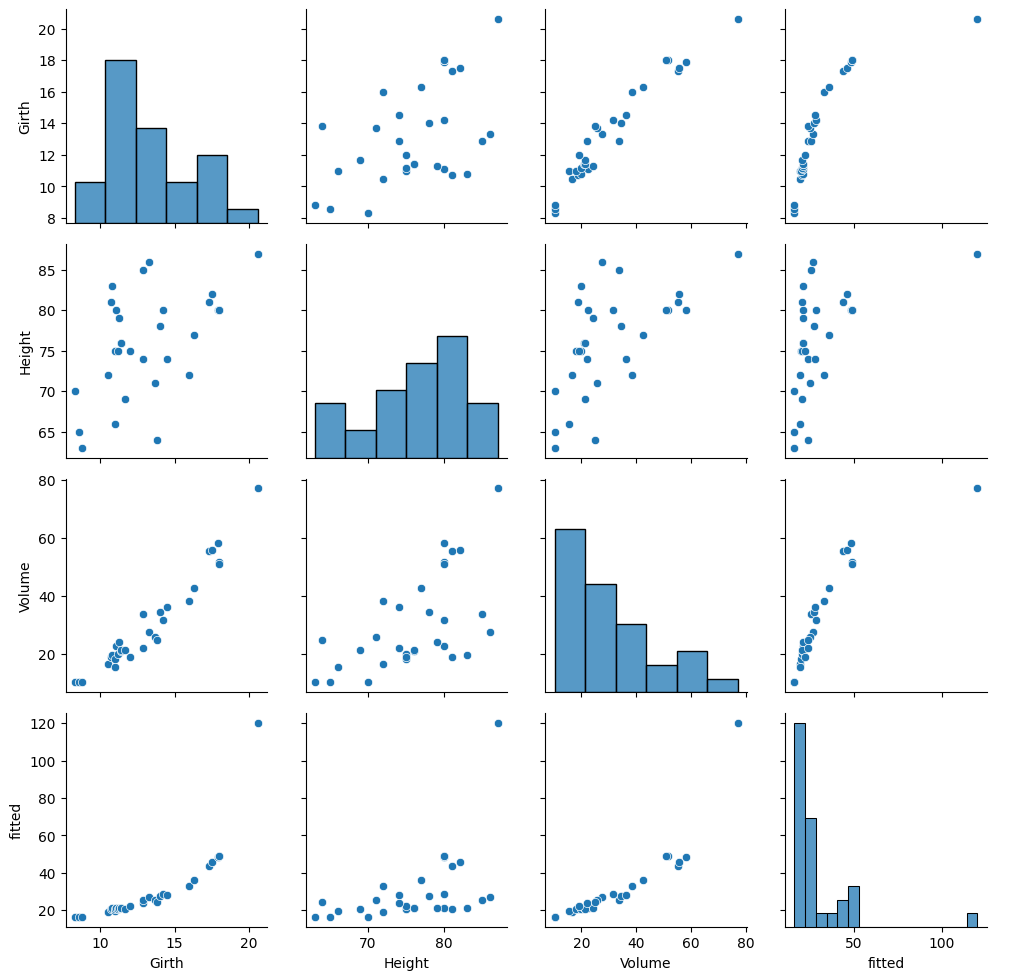

In [105]:
# basic graphs of dataset
g = sns.PairGrid(trees)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

The relationships between the tree volume and height, and tree volume and girth, both appear non-linear.

In [9]:
log_trees = trees.copy()
log_trees['log_Girth'] = np.log(trees['Girth'])
log_trees['log_Height'] = np.log(trees['Height'])
log_trees['log_Volume'] = np.log(trees['Volume'])
log_trees.head()

,Girth,Height,Volume,log_Girth,log_Height,log_Volume
1,8.3,70.0,10.3,2.116256,4.248495,2.332144
2,8.6,65.0,10.3,2.151762,4.174387,2.332144
3,8.8,63.0,10.2,2.174752,4.143135,2.322388
4,10.5,72.0,16.4,2.351375,4.276666,2.797281
5,10.7,81.0,18.8,2.370244,4.394449,2.933857


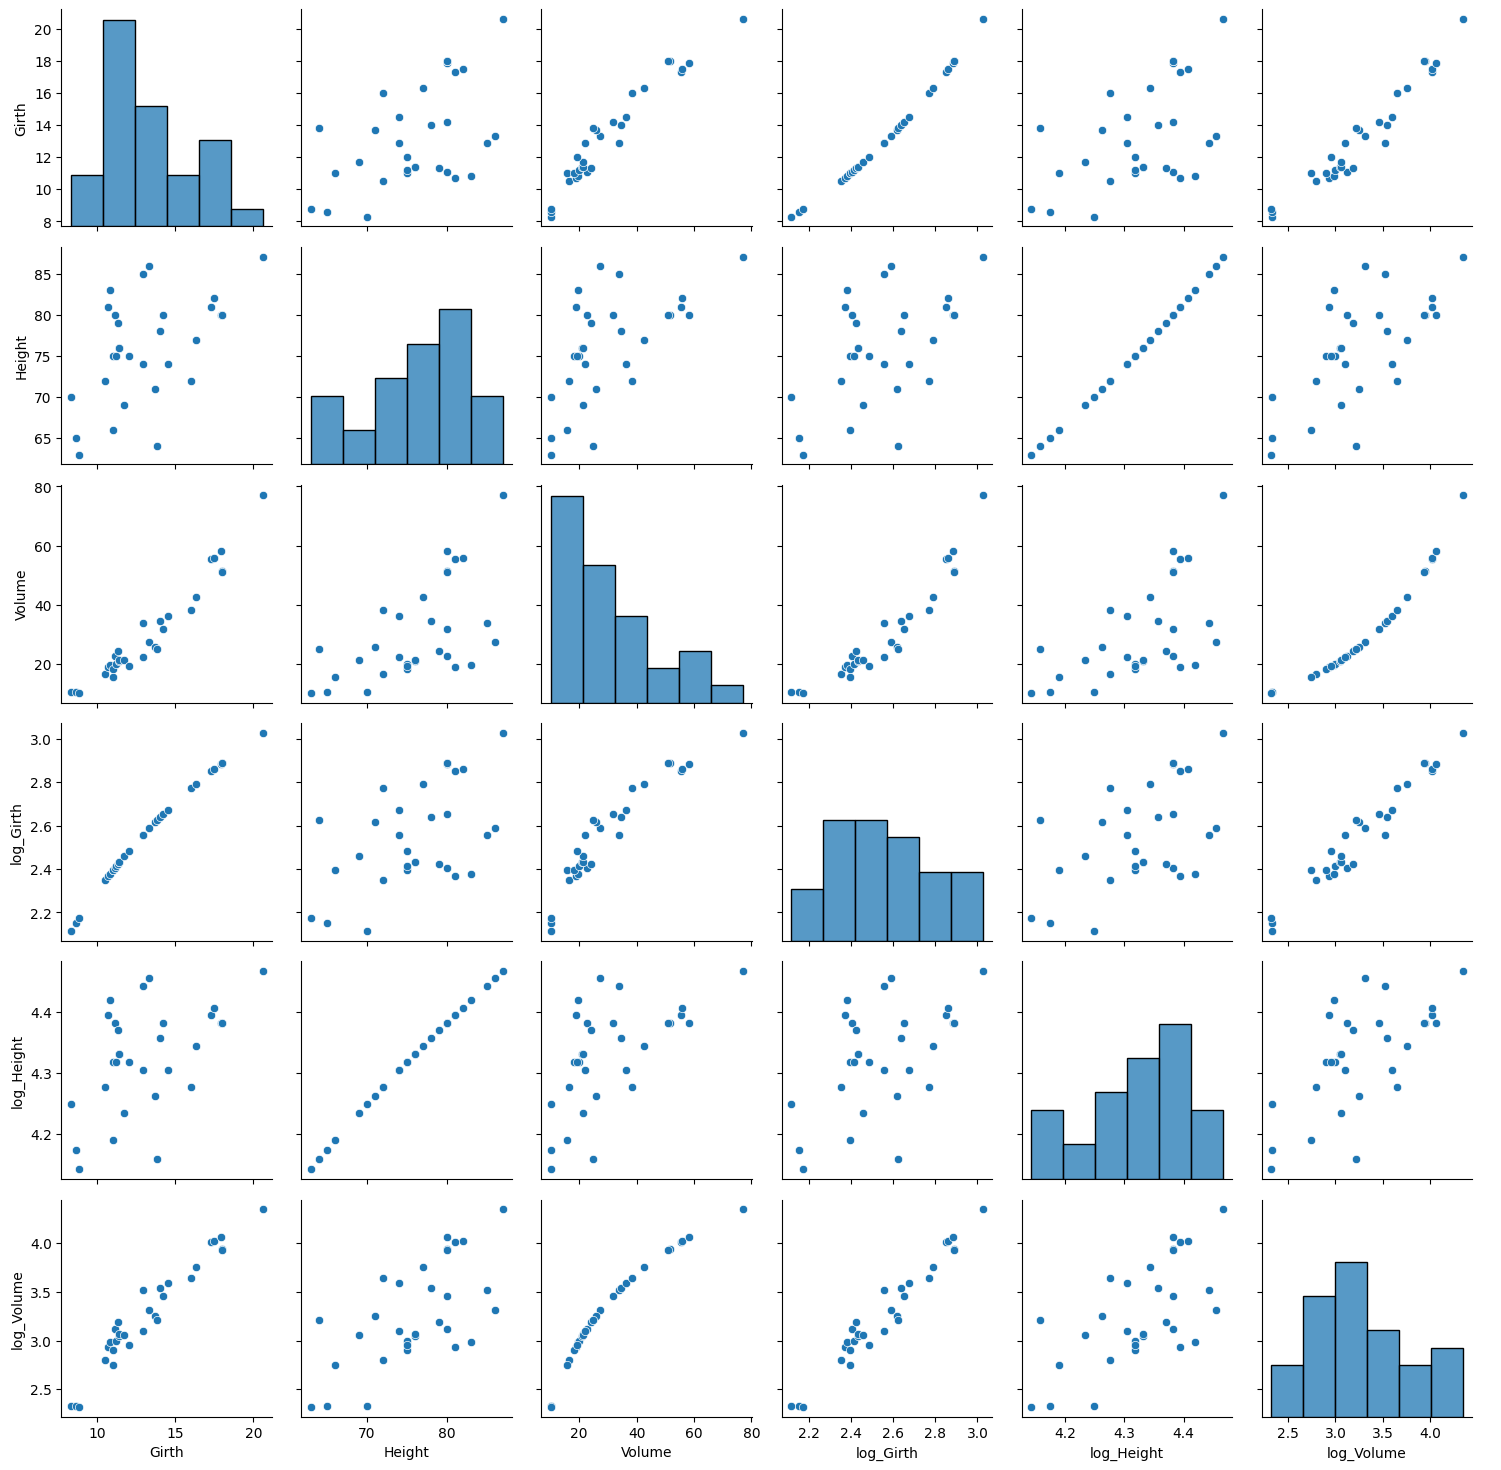

In [10]:
h = sns.PairGrid(log_trees)
h.map_diag(sns.histplot)
h.map_offdiag(sns.scatterplot)
h.add_legend()

In [11]:
trans_trees = trees.copy()
trans_trees['cone'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/12
trans_trees['cylinder'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/4
trans_trees.head()

,Girth,Height,Volume,cone,cylinder
1,8.3,70.0,10.3,8.767189,26.301566
2,8.6,65.0,10.3,8.740100,26.220300
3,8.8,63.0,10.2,8.869763,26.609290
4,10.5,72.0,16.4,14.431691,43.295074
5,10.7,81.0,18.8,16.860044,50.580133


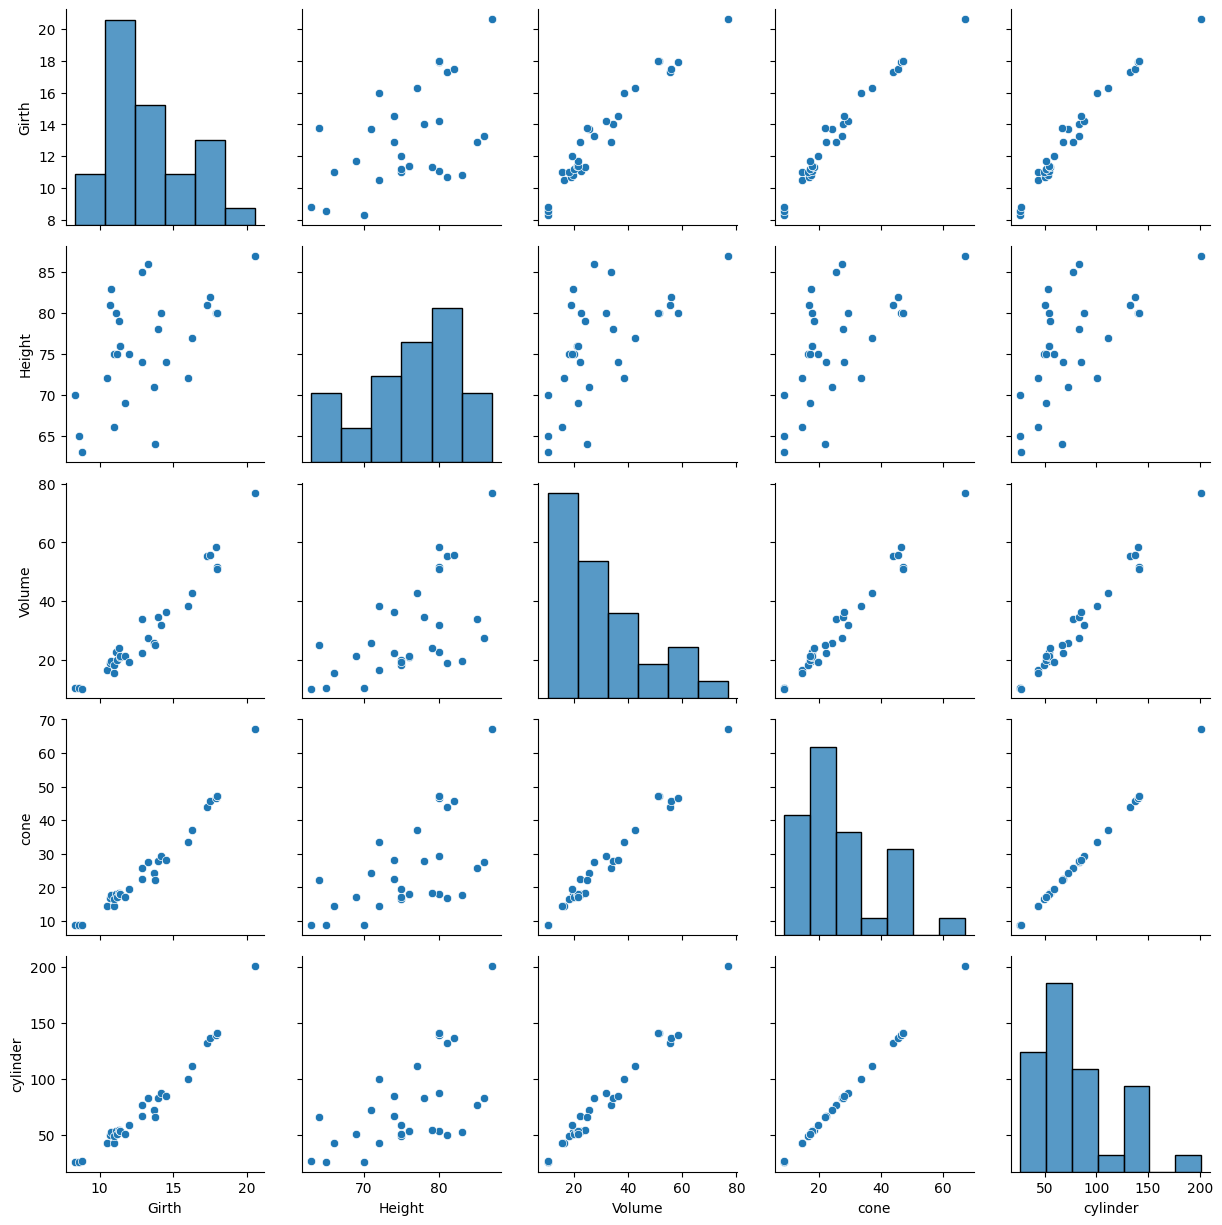

In [12]:
i = sns.PairGrid(trans_trees)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)

## Classical Regression analysis approach
How we did it last term in 01RAD

### Model 0 lm()

In [13]:
trees_m0a = smf.ols(formula='log_Volume ~ log_Girth + log_Height', data=log_trees).fit()
print(trees_m0a.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Volume   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     613.2
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           7.62e-24
Time:                        14:55:04   Log-Likelihood:                 35.356
No. Observations:                  31   AIC:                            -64.71
Df Residuals:                      28   BIC:                            -60.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6316      0.800     -8.292      0.0

If we understand given problem, we can find good linear relation with some advanced transformation of independent varialbes.

In [14]:
trees_m0b = smf.ols(formula='Volume ~ cone - 1', data=trans_trees).fit()
print(trees_m0b.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                    4.14e-36
Time:                        14:55:04   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
trees_m0c = smf.ols(formula='Volume ~ cylinder - 1', data=trans_trees).fit()
print(trees_m0c.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Sun, 06 Apr 2025   Prob (F-statistic):                    4.14e-36
Time:                        14:55:04   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## GLM approach
Since response is continuous nonnegative variable, we use `family = gamma`. In the first approach we try canonical link function, which is for gamma distribution: $g(\mu) = 1/\mu$.

### Model 1 (_m1)

In [16]:
trees_m1 = smf.glm('Volume ~  Girth + Height',
                  data=trees,
                  family=sm.families.Gamma()
                  ).fit()
print(trees_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Sun, 06 Apr 2025   Deviance:                       1.3038
Time:                        14:55:04   Pearson chi2:                     1.17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


https://www.statsmodels.org/stable/glm.html

In [17]:
trees_m1 = smf.glm('Volume ~ Girth + Height',
                  data=trees,
                  family=sm.families.Gamma(link=sm.families.links.InversePower())
                  ).fit()
print(trees_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Sun, 06 Apr 2025   Deviance:                       1.3038
Time:                        14:55:04   Pearson chi2:                     1.17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


 $R^2$ CS by Cox and Snell
https://en.wikipedia.org/wiki/Pseudo-R-squared
$$R_{\text{CS}}^{2}=1-\left({\frac {L_{0}}{L_{M}}}\right)^{2/n}=1-e^{2(\ln(L_{0})-\ln(L_{M}))/n}$$


Cox & Snell’s pseudo-R-squared: 1 - exp((llnull - llf)*(2/nobs))

 $R^2$ by  McFadden’s
 $$ R_{\text{McF}} =  1 - \frac{L_{M}}{L_{0}}$$


by statsmodel
https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLMResults.pseudo_rsquared.html

**Remark**: If estimated two different models, they can have different dispersion !!!

In [18]:
R2_CS_sm = trees_m1.pseudo_rsquared(kind='cs')
R2_McF_sm = trees_m1.pseudo_rsquared(kind='mcf')

In [19]:
# Fit the null model (model with only an intercept)
null_formula = 'Volume ~ 1'
null_model = smf.glm(formula=null_formula, data=trees, family=sm.families.Gamma()).fit()

# log-Likelihood of the null model (L0)
L0 = null_model.llf
dispersion_0 = null_model.scale
print(f'Dispersion of m0: {dispersion_0}')

# log-Likelihood of the null model (L0) from the estimated model with same dispersion
L0 = trees_m1.llnull

# log-Likelihood of the fitted model (LM)
LM = trees_m1.llf

# Number of observations (n)
n = trees.shape[0]

# Compute Cox and Snell pseudo R-squared
R2_CS = 1 - (np.exp((L0 - LM)*(2/n)))
R2_CS_exact = 1 - np.exp((trees_m1.deviance - trees_m1.null_deviance)/trees_m1.nobs)

dispersion = trees_m1.scale
# Cox & Snell exact adjusted (identical to statsmodels):
R2_CS_exact_adj = 1 - np.exp(( (trees_m1.deviance - trees_m1.null_deviance) / dispersion ) / trees_m1.nobs)

print(f'Dispersion of m1: {dispersion}')


print(f'Cox and Snell pseudo R-squared likelihood: {R2_CS}')
print(f'Cox and Snell pseudo R-squared deviance: {R2_CS_exact}')
print(f'Cox and Snell pseudo R-squared deviance adjusted: {R2_CS_exact_adj}')

print(f'Cox and Snell pseudo R-squared by statsmodels: {R2_CS_sm}')




# Compute McFadden’s pseudo R-squared
R2_McF = 1 - (LM/L0)
R2_McF_exact = 1 - (trees_m1.deviance / trees_m1.null_deviance)
# McFadden exact adjusted (identical to statsmodels):
R2_McF_exact_adj = 1 - ( (trees_m1.deviance / dispersion) / (trees_m1.null_deviance / dispersion) )
print(f'McFadden’s pseudo R-squared likelihood: {R2_McF}')
print(f'McFadden’s pseudo R-squared deviance: {R2_McF_exact}')
print(f'McFadden’s pseudo R-squared deviance adjusted: {R2_McF_exact_adj}')
print(f'McFadden’s pseudo R-squared by statsmodels: {R2_McF_sm}')

Dispersion of m0: 0.29683243667793896
Dispersion of m1: 0.04173735596091115
Cox and Snell pseudo R-squared likelihood: 0.995575279623371
Cox and Snell pseudo R-squared deviance: 0.2024728089041018
Cox and Snell pseudo R-squared deviance adjusted: 0.995575279623371
Cox and Snell pseudo R-squared by statsmodels: 0.995575279623371
McFadden’s pseudo R-squared likelihood: 0.4655966199346916
McFadden’s pseudo R-squared deviance: 0.8432427751896606
McFadden’s pseudo R-squared deviance adjusted: 0.8432427751896606
McFadden’s pseudo R-squared by statsmodels: 0.4655966199346916


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


**Pearson chi-squared statistic**

$$ \chi^2 = \sum_{i=1}^n ({r_{i}^{P})^2
=\frac{(y_{i}-\hat{\mu}_{i})^2}{v(\hat\mu_i)}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

In [20]:
# Calculate the expected values (fitted values)
E = trees_m1.fittedvalues

# Calculate the observed values
O = trees['Volume']

# For a Gamma distribution the variance function is V(mu) = mu^2
V_E = E**2

# Calculate the Pearson residuals
r_Pearson = (O - E) / np.sqrt(V_E)

# Calculate the Pearson chi-squared statistic
pearson_chi2 = np.sum(r_Pearson**2)

print(f'Pearson chi-squared statistic: {pearson_chi2}')

Pearson chi-squared statistic: 1.1686459669055127


### Questions:

* What can you say from the `summary()` about the model 0?
* Do you understand to all numbers and do you know how they were computed?

The general formula for deviance:

$$ D = 2  (l_{sat} - l_{model}) $$

where $l_{sat}$ is the log-likelihood of the saturated model and $l_{model}$ is the log-likelihood of the fitted model.

### Step 1: Log-likelihood for Gamma Distribution

For a single observation, the log-likelihood function of the Gamma distribution with the shape parameter $\theta$ and scale parameter $\beta$ is given by:

$$Y \sim \Gamma (a,p) \Rightarrow \theta = \frac{-a}{p}, \phi = \frac{1}{p}, b = -log (-\theta) ⇒ E[Y] = b'(\theta)  = -\frac{1}{\theta} = \frac{p}{a}, \text{where $\theta$ is canonical parameter}  $$
We have canonical link function (the inverse link)
$$\eta_i = g(\mu_i) = \frac{1}{\mu_i} = \theta_i ⇒ g = (b')^{-1}$$

$$l(y; \theta, \beta) = \frac{1}{ϕ}\left( \sum_{i=1}^{n} \left( y_i \theta_i - b(\theta_i) \right) \right) + C $$
For saturated model:
$$ \hat{\theta}_i^{sat} = (b')^{-1}(y_i) = \frac{1}{y_i} \  and \ \hat{\mu_i} = y_i$$



Lets assume that the shape parameter is fixed and we are dealing with the mean $\mu$ only.


$$ D = \frac{2}{ϕ} \left( \sum_{i=1}^{n} \left( y_i (\hat{\theta}_i^{sat} - \hat{\theta}_i^{model}) - (b(\hat{\theta}_i^{sat}) - b(\hat{\theta}_i^{model})) \right) \right)$$


$$ D = 2 \left( \sum_{i=1}^{n} \left( \frac{y_i - \hat{y}_i}{\hat{y}_i} - \log\frac{y_i}{\hat{y}_i} \right) \right)$$



In [90]:

# Fitting the model as specified
trees_m1 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma()).fit()

# Printing the summary
print(trees_m1.summary())

# Calculating the deviance manually
y_hat = trees_m1.predict()
y = trees_m1.model.endog

deviance_hand = 2 * np.sum((y - y_hat) / y_hat  - np.log(y / y_hat))

# Comparing with statsmodels deviance
deviance_statsmodels = trees_m1.deviance

print(deviance_statsmodels)
print(deviance_hand)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Sun, 06 Apr 2025   Deviance:                       1.3038
Time:                        17:29:36   Pearson chi2:                     1.17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.


### Tasks

* Compute different types of residuals.
* Plot residuals vs. fitted values or regressors
* Validate used ling function with working responses.
* Validate used regressors with Component+Residual, ie Partial Residual Plots

# Residuals in GLM and LM Comparison
$$\hat\beta = (X^T \hat{W} X)^{-1}(X^T \hat{W} \hat{Z})$$
where
$$ \hat{W} = diag(\frac{1}{V(\hat{\mu})(g'(\hat{\mu}))^2}) $$
$$\hat{Z}_i = x_i^T \hat{\beta} + (y_i - \hat{\mu_i}) g'(\hat{\mu_i})$$
$$\hat{\mu_i} = g^{-1}(x_i^T \hat{\beta}) $$

Lets denote:
$$ X^* = X^T \hat{W}^{\frac{1}{2}} $$
$$ Y^* = \hat{W}^{\frac{1}{2}} \hat{Z} $$

than $\hat{Y^*} = X^* \hat{\beta} = H^* Y^*$, where $H^* = \hat{W}^{1/2} X (X^T \hat{W} X)^{-1} X^T \hat{W}^{1/2})$ is hat matrix



## Residuals
Consider  the GLM from for the observations $Y_1,\ldots,Y_n$ and assume $a_i(\phi) = a_i \phi$, where $a_i>0$ are known for $i=1,\ldots, n$.



From estimation of GLMs as Locally Like Linear Regression by using IRLS we can obtain weights $W$ with  *working responses* and compute *working residuals*.

**Working residuals**
$$e_i = z_i − \hat{\eta_i} = (y_i - \hat{\mu}_i)g'(\hat{\mu}_i) $$

**Pearson residuals**

$$ {r_{i}^{P}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i\, v(\hat\mu_i)}}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

where $v(\mu_i)$ is called a variance function and $V[Y_i] = a_i \phi v(\mu_i)$.
The Pearson residual is the response residual scaled with with the estimated standard deviation for the observation.


**Pearson standartized residuals**

$$
{r_{i}^{PS}
=}\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{\hat{V}[Y_{i}](1-h_{ii})}}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i \hat\phi \, v(\hat\mu_i)(1-h_{ii})}}
={\frac{r_{i}^{P}}{\sqrt{\hat\phi(1-h_{ii})}}},
$$

**Anscombe residuals**

For models, where $a_i(\phi)=1$
$$
{r_{i}^{A}=\frac{A(y_{i})-A(\hat{\mu}_{i})}{\sqrt{\hat{V}[A(y_{i})]}}},\quad i=1,...,n
$$
where
$$
A(y)=\int_{-\infty}^{y}\frac{d\mu}{v^{1/3}(\mu)}.
$$

**Deviance residual**
* They measure how much each observation contributes to the model’s deviance.
* The deviance residual for the i’th observation is defined as

$$
{r_{i}^{D}=\mbox{sign} (y_{i}-\hat{\mu}_{i})\sqrt{D_{i}}},\quad i=1,...,n,
$$
where
$$
D=\sum_{i=1}^{n}(r_{i}^{D})^{2} = \sum_{i=1}^{n}D_{i}=
\sum_{i=1}^{n}\frac{2}{a_{i}}\left[y_{i}(\tilde{\theta}_{i}-
\hat{\theta}_{i})-\left(b(\tilde{\theta}_{i})-b(\hat{\theta}_{i})\right)\right].
$$


**Deviance standartized residual**
$$
{r_{i}^{DS}=\frac{r_{i}^{D}}{\sqrt{\hat\phi(1-h_{ii})}}},\quad i=1,...,n,
$$

The deviance residuals are the generalization of the residuals from the classical linear model. They are constructed using the analogy between the deviance and the RSS.

Gamma model is necessarily heteroskedastic, because the variance is  proportional to $μ^2$.

In [22]:
# Residuals
observed = trees_m1.model.endog
estimates = trees_m1.fittedvalues
v = estimates**2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution, v = estimates, Bernouli v = estimates(1-estimates), ....

In [23]:
# Response residuals
r_response1 = trees_m1.resid_response
r_response2 = observed - estimates
df = pd.DataFrame(r_response1)
df['r_response2'] = r_response2
df.head()

,0,r_response2
1,-6.141717,-6.141717
2,-6.096985,-6.096985
3,-6.263283,-6.263283
4,-2.939542,-2.939542
5,-1.808704,-1.808704


In [24]:
# Working residuals
r_working1 = trees_m1.resid_working
r_working2 = (observed - estimates) / v
df['r_working1'] = r_working1
df['r_working2'] = r_working2
df.head()

,0,r_response2,r_working1,r_working2
1,-6.141717,-6.141717,0.022719,-0.022719
2,-6.096985,-6.096985,0.022677,-0.022677
3,-6.263283,-6.263283,0.023108,-0.023108
4,-2.939542,-2.939542,0.007859,-0.007859
5,-1.808704,-1.808704,0.004259,-0.004259


**Task**: Show, why `r_working1 = - r_working2`

In [25]:
# Pearson residuals
r_pearson1 = trees_m1.resid_pearson # Pearson residuals from resid() function
r_pearson2 = (observed - estimates) / np.sqrt(v)    # Pearson residuals from above definitionf for gamma
df['r_pearson1'] = r_pearson1
df['r_pearson2'] = r_pearson2
df.head()

,0,r_response2,r_working1,r_working2,r_pearson1,r_pearson2
1,-6.141717,-6.141717,0.022719,-0.022719,-0.373545,-0.373545
2,-6.096985,-6.096985,0.022677,-0.022677,-0.371836,-0.371836
3,-6.263283,-6.263283,0.023108,-0.023108,-0.380439,-0.380439
4,-2.939542,-2.939542,0.007859,-0.007859,-0.151996,-0.151996
5,-1.808704,-1.808704,0.004259,-0.004259,-0.087764,-0.087764


In [26]:
def compute_residuals(model):
    # Assumed inputs and preliminary calculations
    Y_obs = model.model.endog
    mu_hat = model.fittedvalues
    phi_hat = model.scale
    var_weights = model.model.var_weights if model.model.var_weights is not None else np.ones_like(Y_obs)
    V = model.family.variance(mu_hat)

    # Compute leverage values
    influence = model.get_influence(observed=False)  # Adjust as necessary for your model
    h_ii = influence.hat_matrix_diag  # Leverage values

    # Working Residuals
    working_residuals = model.resid_working

    # Pearson Residuals
    pearson_residuals = (Y_obs - mu_hat) / np.sqrt(var_weights * V)

    # Pearson Standardized Residuals
    pearson_standardized_residuals = pearson_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Deviance Residuals
    deviance_residuals = model.resid_deviance

    # Deviance Standardized Residuals
    deviance_standardized_residuals = deviance_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Compile into a DataFrame
    residuals_df = pd.DataFrame({
        "Original_Values": Y_obs,
        "Predicted_Values": mu_hat,
        "Working_Residuals": working_residuals,
        "Pearson_Residuals": pearson_residuals,
        "Pearson_Standardized_Residuals": pearson_standardized_residuals,
        "Deviance_Residuals": deviance_residuals,
        "Deviance_Standardized_Residuals": deviance_standardized_residuals
    })

    return residuals_df



In [27]:
residuals_df = compute_residuals(trees_m1)
residuals_df.head()

,Original_Values,Predicted_Values,Working_Residuals,Pearson_Residuals,Pearson_Standardized_Residuals,Deviance_Residuals,Deviance_Standardized_Residuals
1,10.3,16.441717,0.022719,-0.373545,-1.875256,-0.433897,-2.178233
2,10.3,16.396985,0.022677,-0.371836,-1.874979,-0.431550,-2.176090
3,10.2,16.463283,0.023108,-0.380439,-1.930384,-0.443408,-2.249893
4,16.4,19.339542,0.007859,-0.151996,-0.760343,-0.160462,-0.802690
5,18.8,20.608704,0.004259,-0.087764,-0.452029,-0.090472,-0.465974


In [28]:
trees_modeled = trees.copy()

In [29]:
!pip install plotnine

In [30]:
from plotnine import ggplot, aes, geom_line, geom_smooth, geom_abline, geom_point, labs, geom_qq_line, geom_qq
%matplotlib inline

In [31]:
trees['fitted'] = trees_m1.fittedvalues

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


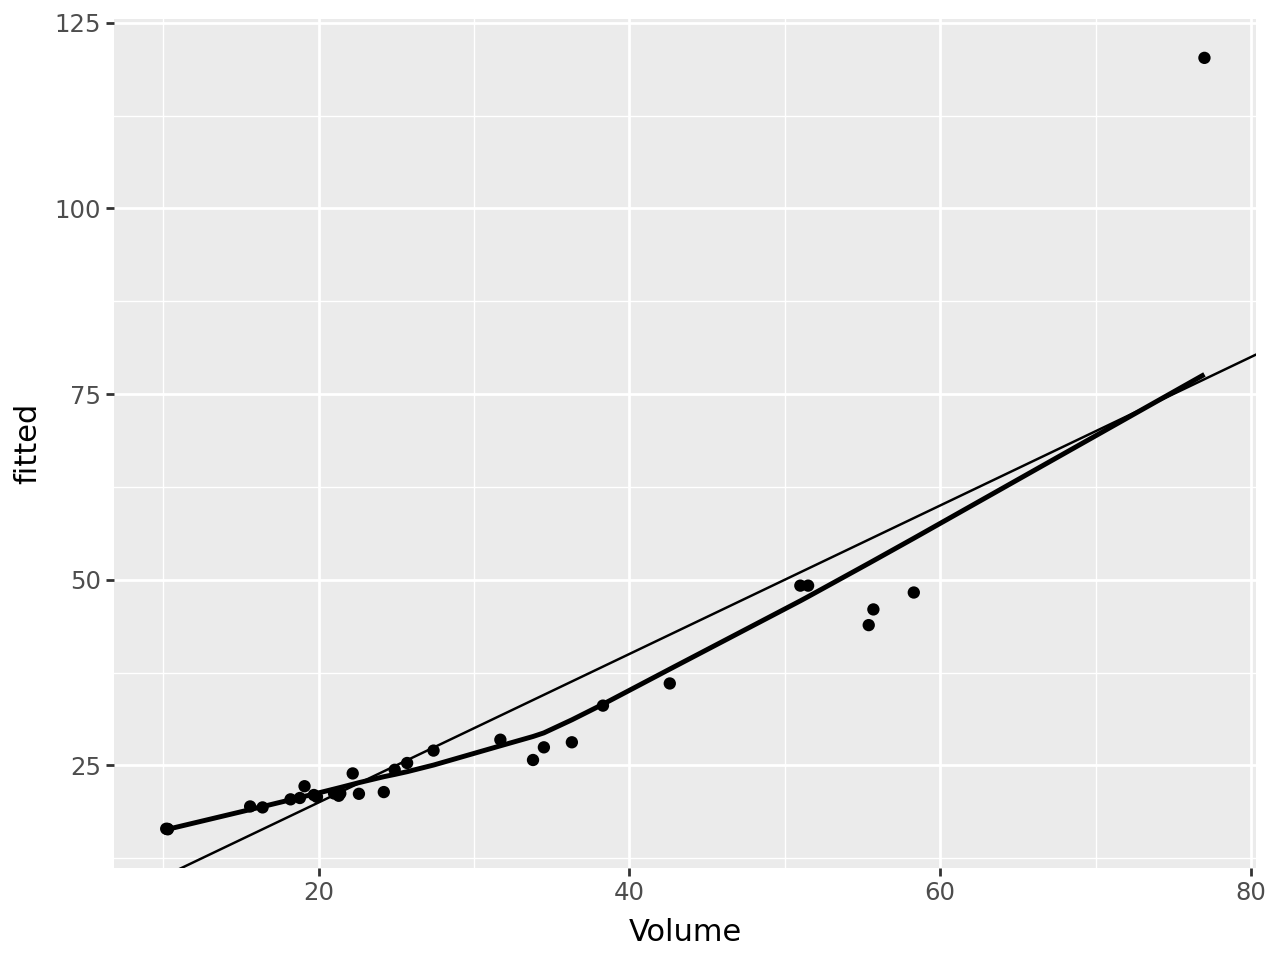

In [32]:
ggplot(trees, aes(x = 'Volume', y = 'fitted')) + \
      geom_smooth()+ \
      geom_point() + \
      geom_abline(intercept = 0, slope = 1)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


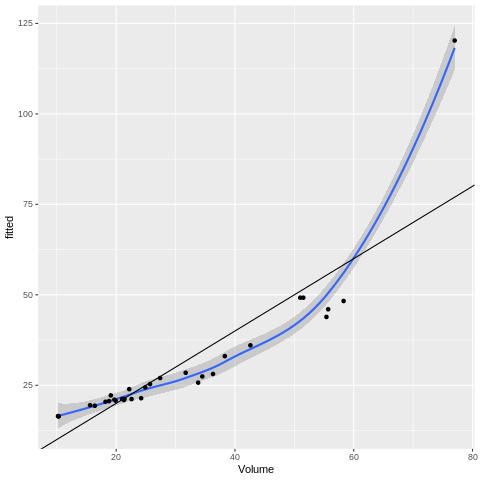

In [33]:
%%R -o trees_modeled
library("tidyverse")
trees_m1 <- glm( Volume ~ Girth + Height, data=trees, family=Gamma)
summary(trees_m1)

expected  <- trees_m1$y
estimates <- trees_m1$fitted.values
v         <- estimates^2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution: v = estimates,
# If Bernouli: v = estiamtes(1-estimates), ...

r_response1 <- residuals(trees_m1, type="response")
r_response2 <- (expected - estimates)
head(cbind(r_response1,r_response2))

# Working residuals
r_working1 <- residuals(trees_m1, type="working")
r_working2 <- (expected - estimates) / v
r_working3 <- trees_m1$residuals
head(cbind(r_working1,r_working2,r_working3))

# Pearson residuals
r_pearson1 <- residuals(trees_m1, type="pearson") # Pearson residuals from resid() function
r_pearson2 <- (expected - estimates) / sqrt(v)    # Pearson residuals from above definitionf for gamma
head(cbind(r_pearson1,r_pearson2))

# Pearson standartized residuals
r_pearson_std1 <- rstandard(trees_m1, type = "pearson")

# compute estimation of dispersion parametr phi by hand and from summary function
w <- weights(trees_m1, type="working")
e <- residuals(trees_m1, type="working")
phi_est_hand <- sum(w * e^2) /df.residual(trees_m1)
phi_est <- summary(trees_m1)$dispersion # Pearsons estiamtes of phi
cbind(phi_est_hand, phi_est)
# Pearson standartized residuals by hand
r_pearson_std2 <- r_pearson2 / sqrt(phi_est*(1 - hatvalues(trees_m1)) )
head(cbind(r_pearson_std1,r_pearson_std2))

# Deviance residuals
r_deviance <- resid(trees_m1 )
r_deviance_std <- rstandard(trees_m1) # Standart
head(cbind(r_deviance,r_deviance_std))
? rstandard

trees_modeled <- trees %>%
  mutate(fitted = trees_m1$fitted.values,
         r_deviance_std =rstandard(trees_m1, type = "deviance"),
         r_pearson_std = rstandard(trees_m1, type = "pearson") )
head(trees_modeled)

p <- ggplot(trees_modeled, aes(x = Volume,y = fitted)) +
      geom_smooth()+
      geom_point() +
      geom_abline(intercept = 0, slope = 1)
p

Plots of the residuals against the fitted values $\mu$ and the residuals against
$x_j$ are the main tools for diagnostic analysis. Using deviance residuals is preferred in these plots because they have approximately constant variance.

Check the distribution with quentile residuals:

If the model is correctly specified, Quantile Residuals should follow a standard normal distribution.


Call:
glm(formula = Volume ~ log(Girth) + log(Height), family = Gamma(link = "log"), 
    data = trees)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.69111    0.78784  -8.493 3.11e-09 ***
log(Girth)   1.98041    0.07389  26.802  < 2e-16 ***
log(Height)  1.13288    0.20138   5.625 5.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.006427286)

    Null deviance: 8.31720  on 30  degrees of freedom
Residual deviance: 0.18352  on 28  degrees of freedom
AIC: 139.9

Number of Fisher Scoring iterations: 3



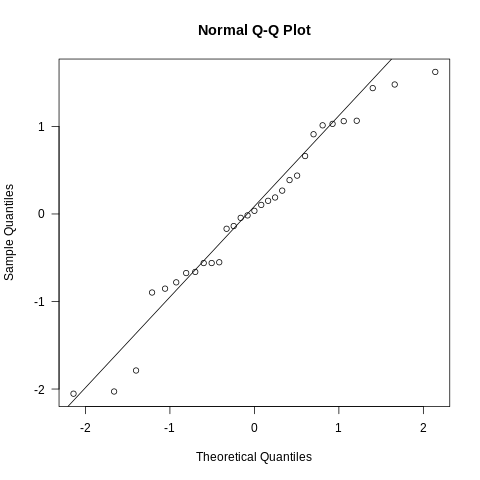

In [34]:
%%R
m1 <- glm( Volume ~  log(Girth) + log(Height), data=trees, family=Gamma(link="log"))
qr.m1 <- qresid(m1)
qqnorm(qr.m1, las=1 )
qqline(qr.m1)
print(summary(m1))

In [35]:
%%R
qr.m1

          1           2           3           4           5           6 
 0.26653694  0.43809507  0.18827154 -0.13806664 -0.56061925 -0.55194323 
          7           8           9          10          11          12 
-0.67510580 -0.56073258  1.01246808  0.10332985  1.62271071  0.15015973 
         13          14          15          16          17          18 
 0.38699556  1.06468907 -2.05301087 -1.78816995  1.47887541 -2.02813132 
         19          20          21          22          23          24 
-0.89729983 -0.01635196  0.91036351 -0.85311097  1.43750032  0.03607137 
         25          26          27          28          29          30 
-0.04424172  1.06019813  0.66156549  1.02912846 -0.66200168 -0.78125159 
         31 
-0.16903433 


In [36]:
quantile_residuals

NameError: name 'quantile_residuals' is not defined

Not in Statsmodels
https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLMResults.html

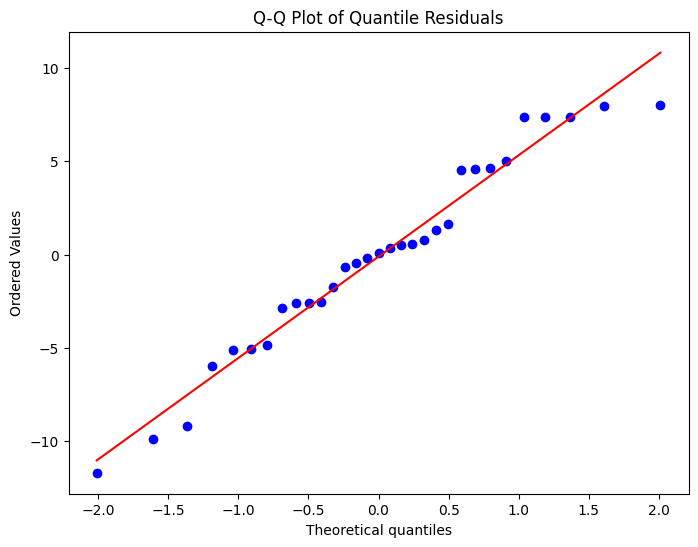

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                       0.0064273
Method:                          IRLS   Log-Likelihood:                -66.003
Date:                Sun, 06 Apr 2025   Deviance:                      0.18352
Time:                        14:55:28   Pearson chi2:                    0.180
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -6.6911      0.788     -8.

In [37]:
# Define the formula for the model based on your description
formula = 'Volume ~ np.log(Girth) + np.log(Height)'

# Fit a Gamma GLM with a log link
m1 = smf.glm(formula=formula, data=trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()

def compute_quantile_residuals_gamma_log(fitted_glm_model):
    # Extract the model's fitted values
    mu = fitted_glm_model.mu

    # Get the response variable from the model
    y = fitted_glm_model.model.endog

    # Compute the cumulative probabilities of the observed responses
    family = fitted_glm_model.family
    if isinstance(family, sm.families.Gamma) and isinstance(family.link, sm.families.links.Log):
        # For Gamma with log link, compute the scale parameter from the mean
        scale = fitted_glm_model.scale
        scale = 0.006427286
        cdf_values = stats.gamma.cdf(y, a=mu/scale, scale=scale)
    else:
        raise NotImplementedError("This function currently supports only Gamma GLM with a log link.")

    # Compute the quantile residuals by applying the inverse CDF of the standard normal distribution
    quantile_residuals = stats.norm.ppf(cdf_values)

    return quantile_residuals


# Q-Q plot
quantile_residuals = compute_quantile_residuals_gamma_log(m1)
plt.figure(figsize=(8, 6))
stats.probplot(quantile_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Quantile Residuals')
plt.show()
print(m1.summary())

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


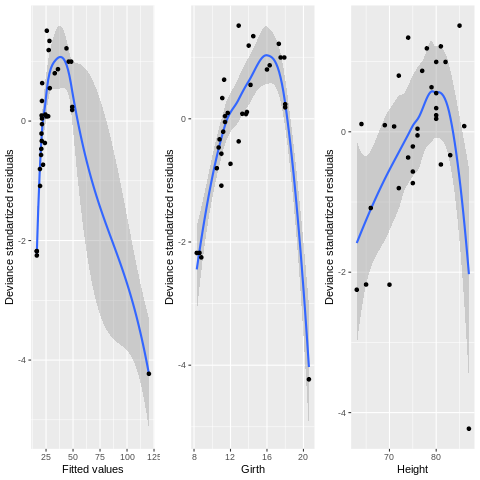

In [38]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)


If the evidence shows problems with the systematic component, then the
cause may be an incorrect link function, or an incorrect linear predictor (for
example, important explanatory variables are missing, or covariates should
be transformed), or both.

*Working responses* $z_i = \hat\eta_i + g^\prime(\hat\mu_i) (y_i-\hat\mu_i)$
 can be determined from working residuals, obtained by the function `resid(model, type="working")`.

 We plot Working responses against predicted values of linear predictor $\hat\eta_i$.


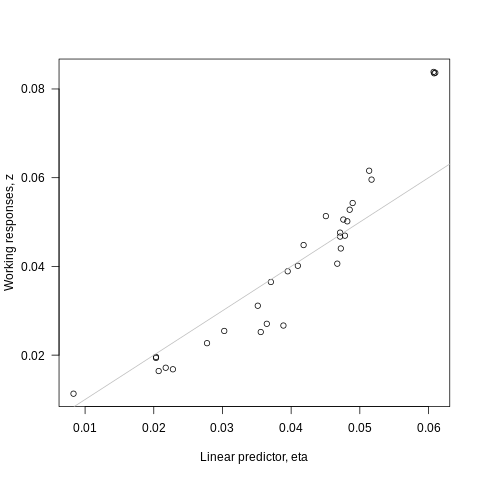

In [39]:
%%R
eta <- trees_m1$linear.predictor
z  <- resid(trees_m1, type="working") + eta
plot( z ~ eta, las=1,
        xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")

To determine if covariate $x_j$ is included on the incorrect scale, use partial
residuals
$$ u_j = e_i + \hat{\beta}_j X_j.$$
In R use function `resid(fit, type="partial")`.

Component+Residual (Partial Residual plot, ie. $x_j$ against $j$th partial residuals) can be plotted by function `termplot()` or `crPlots()` from the library `cars`

Partial Residual Plot
The partial residual plot (component-plus-residual plot) is a diagnostic visualization tool to assess the functional form and appropriateness of individual predictors.

Partial residual for predictor $X_j$ is defined as:

$$u_j = \hat{\beta}_j X_j + \text{(working residuals)} $$


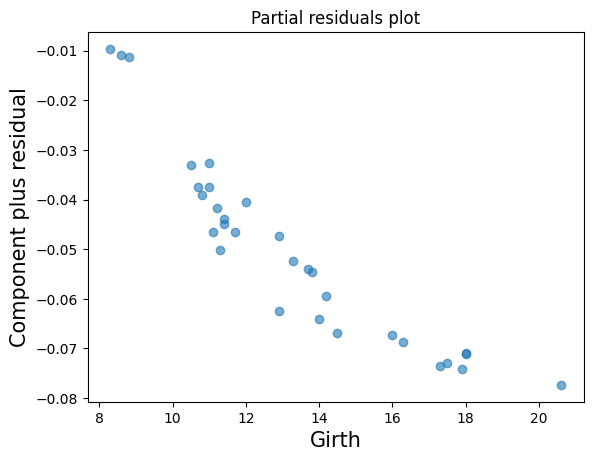

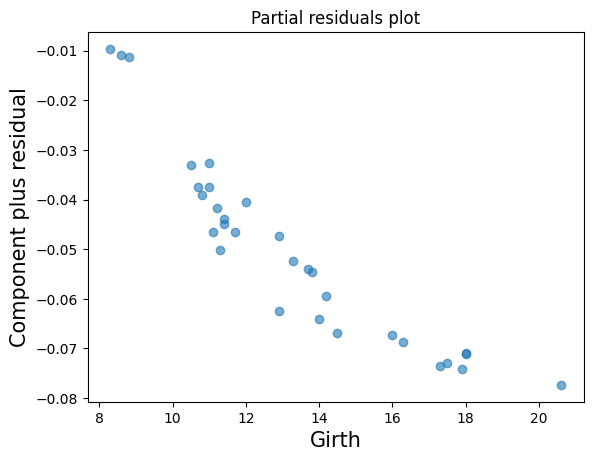

In [40]:
trees_m1.plot_partial_residuals('Girth')

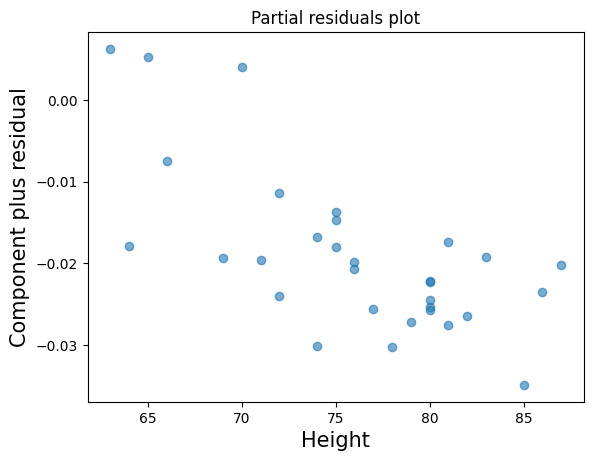

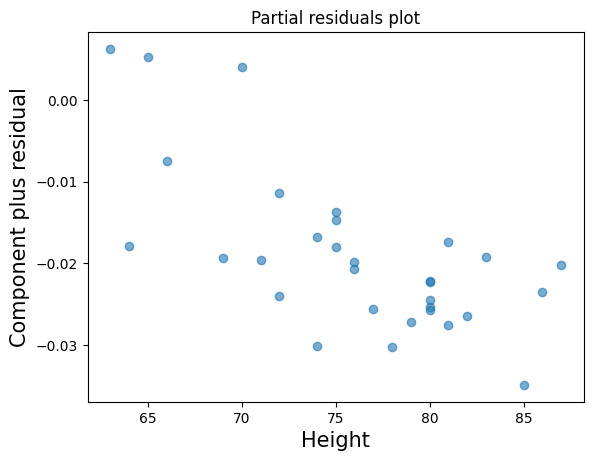

In [41]:

trees_m1.plot_partial_residuals('Height')

In [42]:
%%R
trees_modeled <- trees_modeled %>%
mutate(Partial_for_Girth = as.data.frame(resid(trees_m1, type="partial"))$Girth,
        Partial_for_Height = as.data.frame(resid(trees_m1, type="partial"))$Height)
summary(trees_modeled)

     Girth           Height       Volume          fitted      
 Min.   : 8.30   Min.   :63   Min.   :10.20   Min.   : 16.40  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40   1st Qu.: 20.83  
 Median :12.90   Median :76   Median :24.20   Median : 23.92  
 Mean   :13.25   Mean   :76   Mean   :30.17   Mean   : 30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30   3rd Qu.: 30.75  
 Max.   :20.60   Max.   :87   Max.   :77.00   Max.   :120.27  
 r_deviance_std     r_pearson_std      Partial_for_Girth   Partial_for_Height  
 Min.   :-4.22963   Min.   :-3.66575   Min.   :-0.025677   Min.   :-1.461e-02  
 1st Qu.:-0.51648   1st Qu.:-0.49891   1st Qu.:-0.015393   1st Qu.:-5.201e-03  
 Median : 0.08057   Median : 0.08097   Median : 0.001498   Median : 5.266e-05  
 Mean   :-0.13507   Mean   :-0.05613   Mean   : 0.001255   Mean   : 1.255e-03  
 3rd Qu.: 0.71726   3rd Qu.: 0.75105   3rd Qu.: 0.011831   3rd Qu.: 3.228e-03  
 Max.   : 1.51200   Max.   : 1.65949   Max.   : 0.042016   Max.   : 2.658e-02  

`geom_smooth()` using formula = 'y ~ x'


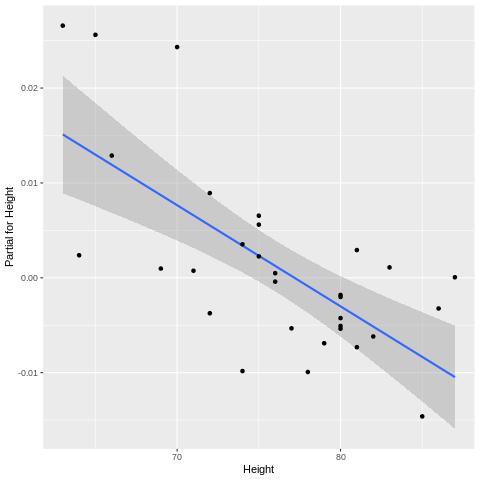

In [43]:
%%R
ggplot(trees_modeled, aes(x = Girth, y = Partial_for_Girth)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Girth",
       x = "Girth")

 ggplot(trees_modeled, aes(x = Height, y = Partial_for_Height)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Height",
       x = "Height")

File: /tmp/Rtmp4nTgS3/Rtxt1112597aec6
termplot                 package:stats                 R Documentation



_P_l_o_t _R_e_g_r_e_s_s_i_o_n _T_e_r_m_s



_D_e_s_c_r_i_p_t_i_o_n:



     Plots regression terms against their predictors, optionally with

     standard errors and partial residuals added.



_U_s_a_g_e:



     termplot(model, data = NULL, envir = environment(formula(model)),

              partial.resid = FALSE, rug = FALSE,

              terms = NULL, se = FALSE,

              xlabs = NULL, ylabs = NULL, main = NULL,

              col.term = 2, lwd.term = 1.5,

              col.se = "orange", lty.se = 2, lwd.se = 1,

              col.res = "gray", cex = 1, pch = par("pch"),

              col.smth = "darkred", lty.smth = 2, span.smth = 2/3,

              ask = dev.interactive() && nb.fig < n.tms,

              use.factor.levels = TRUE, smooth = NULL, ylim = "common",

              plot = TRUE, transform.x = FALSE, ...)

     



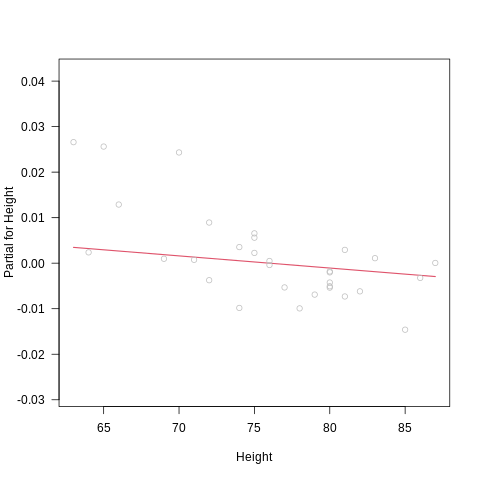

In [44]:
%%R
termplot(trees_m1, partial.resid=TRUE, las=1)
?termplot


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’

trying URL 'https://cran.rstudio.com/src/contrib/rbibutils_2.3.tar.gz'
Content type 'application/x-gzip' length 1132601 bytes (1.1 MB)
downloaded 1.1 MB

trying URL 'https://cran.rstudio.com/src/contrib/cowplot_1.1.3.tar.gz'
Content type 'application/x-gzip' length 1350286 bytes (1.3 MB)
downloaded 1.3 MB

trying URL 'https://cran.rstudio.com/src/contrib/Deriv_4.1.6.tar.gz'
Content type 'application/x-gzip' length 37831 bytes (36 KB)
downloaded 36 KB

trying URL 'https://cran.rstudio.com/src/contrib/microbenchmark_1.5.0.tar.gz'
Content type 'application/x-gzip' length 61673 bytes (60 KB)
downloaded 60 KB

trying URL 'https://cran.rstudio.com/src/contrib/Rdpack

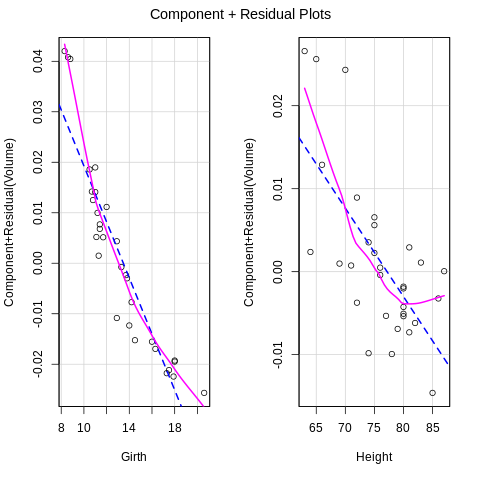

In [45]:
%%R
install.packages("car")
library(car)
#? crPlot
crPlots(trees_m1)

Link function is not choose correctly. Try another link function.

### Model 2 (_m2)

Let's try gamma distribution with link function $g(\mu)=\log \mu$.

In [46]:
%%R
trees_m2 <- update(trees_m1, family=Gamma(link="log"))
summary(trees_m2)
#printCoefmat(coef(summary(trees_m2)))


Call:
glm(formula = Volume ~ Girth + Height, family = Gamma(link = "log"), 
    data = trees)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.092305   0.215868   0.428    0.672    
Girth       0.145281   0.006604  21.999  < 2e-16 ***
Height      0.016578   0.003252   5.097 2.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.009410213)

    Null deviance: 8.31720  on 30  degrees of freedom
Residual deviance: 0.26247  on 28  degrees of freedom
AIC: 151.01

Number of Fisher Scoring iterations: 4




Similar plots and analysis we did with model 01.

In [47]:
%%R
trees_modeled<- trees_modeled %>%
  mutate(fitted2 = trees_m2$fitted.values,
         r_deviance_std2 =rstandard(trees_m2, type = "deviance"),
         r_pearson_std2= rstandard(trees_m2, type = "pearson") )
head(trees_modeled)

  Girth Height Volume   fitted r_deviance_std r_pearson_std Partial_for_Girth
1   8.3     70   10.3 16.44172     -2.1782332    -1.8752563        0.04201589
2   8.6     65   10.3 16.39698     -2.1760896    -1.8749792        0.04080377
3   8.8     63   10.2 16.46328     -2.2498930    -1.9303841        0.04045514
4  10.5     72   16.4 19.33954     -0.8026900    -0.7603428        0.01857688
5  10.7     81   18.8 20.60870     -0.4659741    -0.4520289        0.01419620
6  10.8     83   19.7 21.00888     -0.3332398    -0.3262080        0.01251313
  Partial_for_Height  fitted2 r_deviance_std2 r_pearson_std2
1        0.024322282 11.68832      -1.3576318     -1.3021782
2        0.025615830 11.23782      -0.9588298     -0.9315761
3        0.026581430 11.19185      -1.0383346     -1.0069491
4        0.008927998 16.63260      -0.1493268     -0.1486283
5        0.002922797 19.87816      -0.6073893     -0.5962548
6        0.001095366 20.84900      -0.6300365     -0.6182986


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


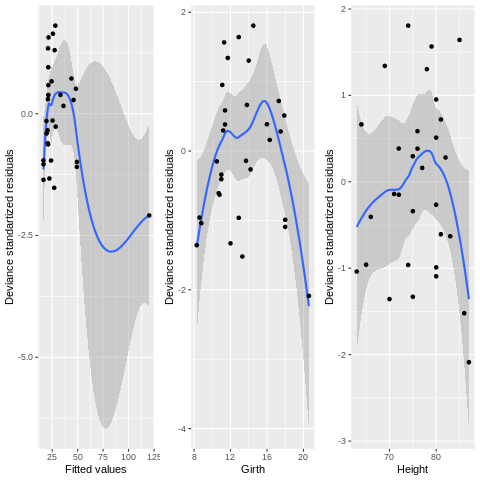

In [48]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)

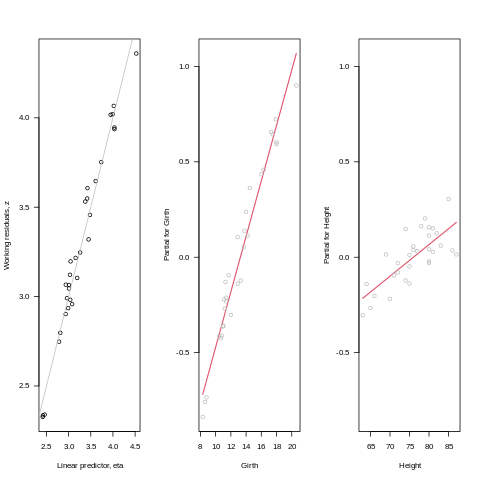

In [49]:
%%R
par(mfrow=c(1,3))
eta <-trees_m2$linear.predictor
z <- resid(trees_m2, type="working") + eta
plot( z ~ eta, las=1, las=1,
        xlab="Linear predictor, eta", ylab="Working residuals, z")
abline(0, 1, col="grey")
termplot(trees_m2, partial.resid=TRUE, las=1)

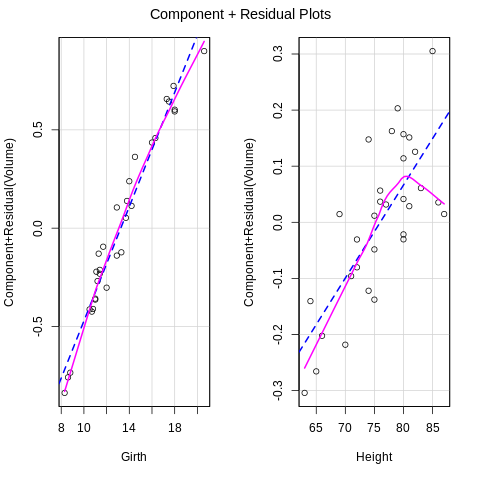

In [50]:
%%R
crPlots(trees_m2)

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [51]:
%%R
trees_m3 <- glm( Volume ~ log(Girth) + log(Height),
                    family=Gamma(link=log), data=trees)
#summary(trees_m3)
printCoefmat(coef(summary(trees_m3)))

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -6.69111    0.78784 -8.4929 3.108e-09 ***
log(Girth)   1.98041    0.07389 26.8021 < 2.2e-16 ***
log(Height)  1.13288    0.20138  5.6255 5.037e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


All covariates are significant in the model.



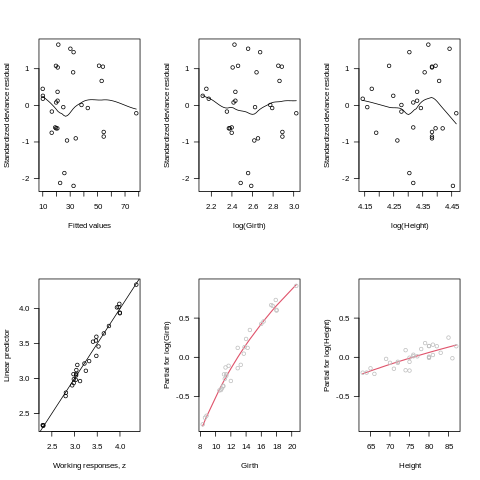

In [52]:
%%R
par(mfrow=c(2,3))

scatter.smooth( rstandard(trees_m3) ~ fitted(trees_m3), las=1,
                  ylab="Standardized deviance residual", xlab="Fitted values" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Girth), las=1,
                  ylab="Standardized deviance residual", xlab="log(Girth)" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Height), las=1,
                  ylab="Standardized deviance residual", xlab="log(Height)" )

z <- resid(trees_m3, type="working") +trees_m3$linear.predictor
plot( z ~trees_m3$linear.predictor, las=1,
        xlab="Working responses, z", ylab="Linear predictor")
abline(0, 1) # Adds line of equality

termplot(trees_m3, partial.resid=TRUE, las=1)

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [53]:
%%R
AIC <- c(trees_m1$aic,trees_m2$aic,trees_m3$aic)
names(AIC) <- c("AIC.1", "AIC.2", "AIC.3")
AIC

   AIC.1    AIC.2    AIC.3 
200.8706 151.0081 139.9014 


### Question:


* Are residuals from the model 3 normal?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.utils’, ‘deldir’, ‘polyclip’, ‘sp’, ‘polyCub’, ‘spatstat.geom’

trying URL 'https://cran.rstudio.com/src/contrib/spatstat.data_3.1-6.tar.gz'
Content type 'application/x-gzip' length 3019896 bytes (2.9 MB)
downloaded 2.9 MB

trying URL 'https://cran.rstudio.com/src/contrib/spatstat.univar_3.1-2.tar.gz'
Content type 'application/x-gzip' length 69453 bytes (67 KB)
downloaded 67 KB

trying URL 'https://cran.rstudio.com/src/contrib/spatstat.utils_3.1-3.tar.gz'
Content type 'application/x-gzip' length 103118 bytes (100 KB)
downloaded 100 KB

trying URL 'https://cran.rstudio.com/src/contrib/deldir_2.0-4.tar.gz'
Content type 'application/x-gzip' length 103621 bytes (101 KB)
downloaded 101 KB

trying URL 'https://cran.rstudio.com/src/contrib/polyclip_1.10-7.tar.gz'
Content type 'application/x-gzip' length 80102 bytes (78 KB)
downloaded 

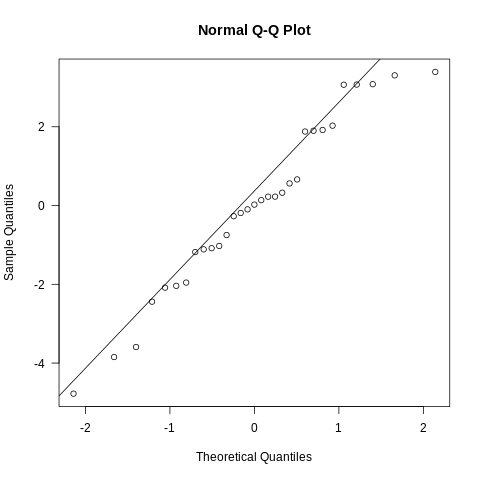

In [54]:
%%R
# Anscombe residuals in R
install.packages('surveillance')
library(surveillance)
r_anscombe <- anscombe.residuals(trees_m3, summary(trees_m1)$dispersion)
qqnorm(r_anscombe, las=1 )
qqline(r_anscombe)


Check normality with test

In [55]:
%%R

install.packages("nortest")
library(nortest)
lillie.test(r_anscombe)
shapiro.test(r_anscombe)

lillie.test(r_deviance_std)
shapiro.test(r_deviance_std)


	Shapiro-Wilk normality test

data:  r_deviance_std
W = 0.88355, p-value = 0.00287



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/nortest_1.0-4.tar.gz'
Content type 'application/x-gzip' length 6179 bytes
downloaded 6179 bytes


The downloaded source packages are in
	‘/tmp/Rtmp4nTgS3/downloaded_packages’


## Influence  Measures

Measures of influence can be computed using the same R functions
as for linear regression models:

• Cook’s distance D: `cooks.distance(model)`.

• dfbetas:  `dfbetas(model)`.

• dffits: `dffits(model)`.

• Covariance ratio cr: `covratio(model)`.

All these measures of influence, together with the leverages $h$, are returned using `influence.measures(model)`.

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

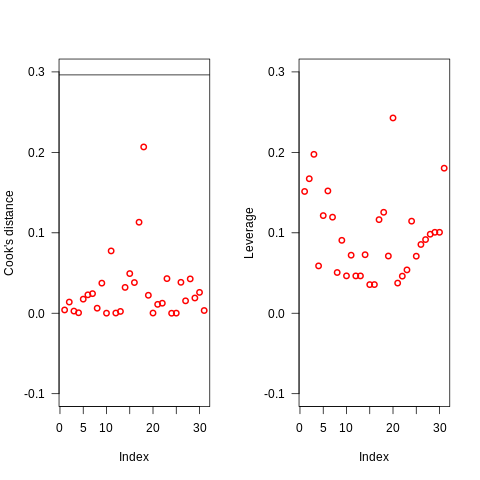

In [56]:
%%R

par(mfrow=c(1,2))
cd <- cooks.distance(trees_m3)
plot( cd, col="red", cex=1.0, lwd=2, ylab="Cook's distance", las=1, ylim = c(-0.1,0.3))
abline(h = (8/(31-4)))
lev <- hatvalues(trees_m3)
plot( lev, col="red", cex=1.0, lwd=2, ylab="Leverage", las=1, ylim = c(-0.1,0.3))

In [57]:
%%R

infl <- which.max(cd)
infl
cd[infl]

       18 
0.2067211 


In [58]:
%%R

cooks.distance(trees_m3)

           1            2            3            4            5            6 
4.082875e-03 1.390620e-02 2.692504e-03 5.964593e-04 1.752456e-02 2.288955e-02 
           7            8            9           10           11           12 
2.436267e-02 6.264727e-03 3.742581e-02 1.003986e-04 7.746218e-02 2.609472e-04 
          13           14           15           16           17           18 
2.251272e-03 3.211862e-02 4.929254e-02 3.815356e-02 1.131422e-01 2.067211e-01 
          19           20           21           22           23           24 
2.233518e-02 2.614032e-04 1.104597e-02 1.247802e-02 4.304539e-02 4.252042e-06 
          25           26           27           28           29           30 
1.374721e-04 3.844647e-02 1.542758e-02 4.269362e-02 1.896139e-02 2.592849e-02 
          31 
3.393537e-03 


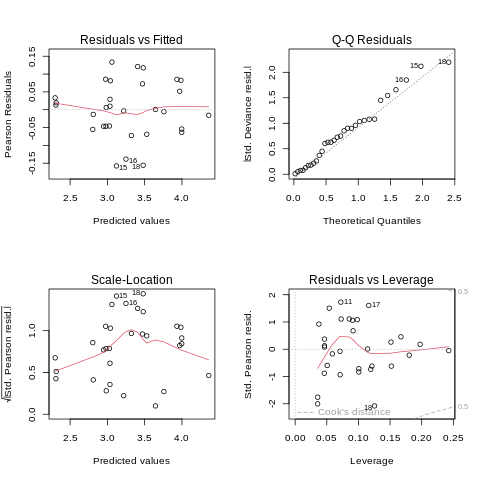

In [59]:
%%R

par(mfrow=c(2,2))
plot(trees_m3)

Let's try to estimate coefficients in the model, where we omitt obesrvation with largest influence.

In [60]:
%%R

trees_m3_infl <- update(trees_m3, subset=(-infl) )
coef(trees_m3_infl)
coef(trees_m3)

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878 


Let's do the same, but omit the first observation instead.

In [61]:
%%R

trees_m3.omit1 <- update(trees_m3, subset=(-1) ) # omit the first observation
coef(trees_m3.omit1)
coef(trees_m3)

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878 


A negligible change again

**Function `influence.measures()`.**

We know it from `lm()` and the usage is very similar. It obtain Cooks distance (`cook.d`) and diagonal elemtns of hat matrix (`hat`) and other influence measures.

In [62]:
%%R

? influence.measures
influence.measures(trees_m3)

Influence measures of
	 glm(formula = Volume ~ log(Girth) + log(Height), family = Gamma(link = log),      data = trees) :

     dfb.1_ dfb.l.G. dfb.l.H.    dffit cov.r   cook.d    hat inf
1   0.01541 -0.08301  0.00489  0.10706 1.305 4.08e-03 0.1514    
2   0.12033 -0.08208 -0.08956  0.19716 1.311 1.39e-02 0.1672    
3   0.06539 -0.02105 -0.05397  0.08707 1.385 2.69e-03 0.1975   *
4  -0.01054  0.02087  0.00449 -0.04134 1.181 5.96e-04 0.0589    
5   0.14519  0.17150 -0.17040 -0.22808 1.218 1.75e-02 0.1214    
6   0.18633  0.19107 -0.21187 -0.26062 1.261 2.29e-02 0.1520    
7  -0.22755 -0.02840  0.20956 -0.27056 1.194 2.44e-02 0.1194    
8   0.01435  0.08115 -0.03237 -0.13630 1.130 6.26e-03 0.0506    
9  -0.19289 -0.22737  0.22688  0.32354 1.094 3.74e-02 0.0906    
10 -0.00140 -0.00917  0.00349  0.01684 1.169 1.00e-04 0.0465    
11 -0.25140 -0.31389  0.30058  0.47271 0.887 7.75e-02 0.0722    
12 -0.00565 -0.01495  0.00872  0.02713 1.168 2.61e-04 0.0464    
13 -0.01652 -0.04372  0.02551  0

In python:

hat_diag (Leverage)

cooks_d (Cook’s distance)

standard_resid (Standardized residuals)

student_resid (Studentized residuals)

dffits (Measure of influence on fitted values)

dfbetas (Change in parameters when dropping each observation)

In [63]:
m3 = smf.glm('Volume ~ np.log(Girth) + np.log(Height)',
             data=trees,
             family=sm.families.Gamma(link=sm.families.links.Log())).fit()

# Influence measures
influence = m3.get_influence()

summary_df = influence.summary_frame()
summary_df

,dfb_Intercept,dfb_np.log(Girth),dfb_np.log(Height),cooks_d,standard_resid,hat_diag,dffits_internal
1,0.015845,-0.086103,0.005200,0.004150,0.262323,0.153210,0.111183
2,0.127620,-0.085377,-0.095349,0.014469,0.457142,0.171984,0.207858
3,0.068294,-0.021257,-0.056528,0.002736,0.181386,0.199652,0.090492
4,-0.010658,0.020967,0.004575,0.000585,-0.169061,0.057849,-0.041807
5,0.142877,0.167266,-0.167338,0.016546,-0.615037,0.116000,-0.223037
6,0.183073,0.186352,-0.207854,0.021584,-0.616492,0.145569,-0.254875
7,-0.220389,-0.028848,0.203264,0.022738,-0.731449,0.113081,-0.261462
8,0.014424,0.079066,-0.031946,0.005930,-0.592832,0.048178,-0.133222
9,-0.211246,-0.246801,0.247962,0.041223,1.065736,0.098191,0.352007
10,-0.001492,-0.009427,0.003632,0.000101,0.078629,0.046655,0.017377


In [64]:
%%R
#Compare cooks distances from im and directly from the function cooks.distance()
im <- influence.measures(trees_m3)
colSums( im$is.inf )
signif(cooks.distance(trees_m3), 1)
im$infmat[,"cook.d"]

           1            2            3            4            5            6 
4.082875e-03 1.390620e-02 2.692504e-03 5.964593e-04 1.752456e-02 2.288955e-02 
           7            8            9           10           11           12 
2.436267e-02 6.264727e-03 3.742581e-02 1.003986e-04 7.746218e-02 2.609472e-04 
          13           14           15           16           17           18 
2.251272e-03 3.211862e-02 4.929254e-02 3.815356e-02 1.131422e-01 2.067211e-01 
          19           20           21           22           23           24 
2.233518e-02 2.614032e-04 1.104597e-02 1.247802e-02 4.304539e-02 4.252042e-06 
          25           26           27           28           29           30 
1.374721e-04 3.844647e-02 1.542758e-02 4.269362e-02 1.896139e-02 2.592849e-02 
          31 
3.393537e-03 


No suspicious outliers or leverage points.

Another tools

****************************************************
Please Input a screen number (1,2,3 or 4)
0 will terminate the function 
1
Interactive Identification for screen 1 
left button = Identify, center button = Exit
****************************************************
Please Input a screen number (1,2,3 or 4)
0 will terminate the function 


Exception ignored from cffi callback <function _consoleread at 0x7de1a463bd80>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 69, in _consoleread
    reply = consoleread(s)
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 54, in consoleread
    return input(prompt)
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1177, in raw_input
    return self._input_request(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user


Error in if ((length(num) > 0L) && ((num == 1) || (num == 2) || (num ==  : 
  missing value where TRUE/FALSE needed


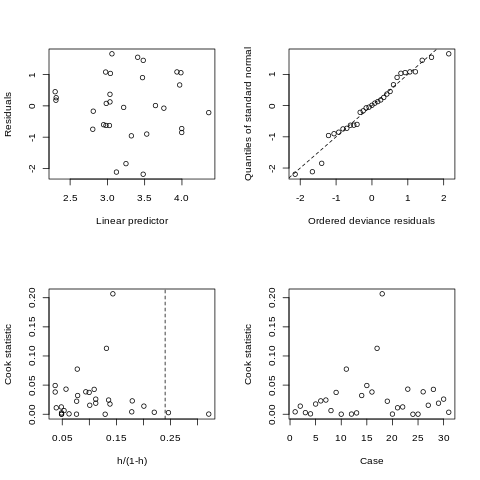

RInterpreterError: Failed to parse and evaluate line 'glm.diag.plots(trees_m3, glmdiag = glm.diag(trees_m3), iden = TRUE)\n'.
R error message: 'Error in if ((length(num) > 0L) && ((num == 1) || (num == 2) || (num ==  : \n  missing value where TRUE/FALSE needed'

In [65]:
%%R
glm.diag.plots(trees_m3, glmdiag = glm.diag(trees_m3), iden = TRUE)

## Predictions from final model


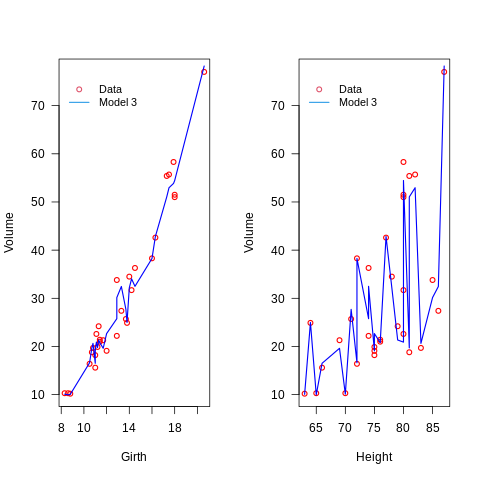

In [66]:
%%R
par(mfrow=c(1,2))
plot(trees$Volume ~ trees$Girth, col="red", cex=0.9, lwd=1.5,
     xlab = "Girth", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(fitted(trees_m3) ~ trees$Girth, col="blue", type = "l", lwd=1.5)

trees_3 <- data.frame(trees, fitted(trees_m3))
trees_3 <- trees_3[order(trees_3$Height),]
plot(trees_3$Volume ~ trees_3$Height, col="red", cex=0.9, lwd=1.5,
     xlab = "Height", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(trees_3$fitted.trees_m3. ~ trees_3$Height, col="blue", type = "l", lwd=1.5)

Figure from: https://link.springer.com/chapter/10.1007/978-1-4419-0118-7_8

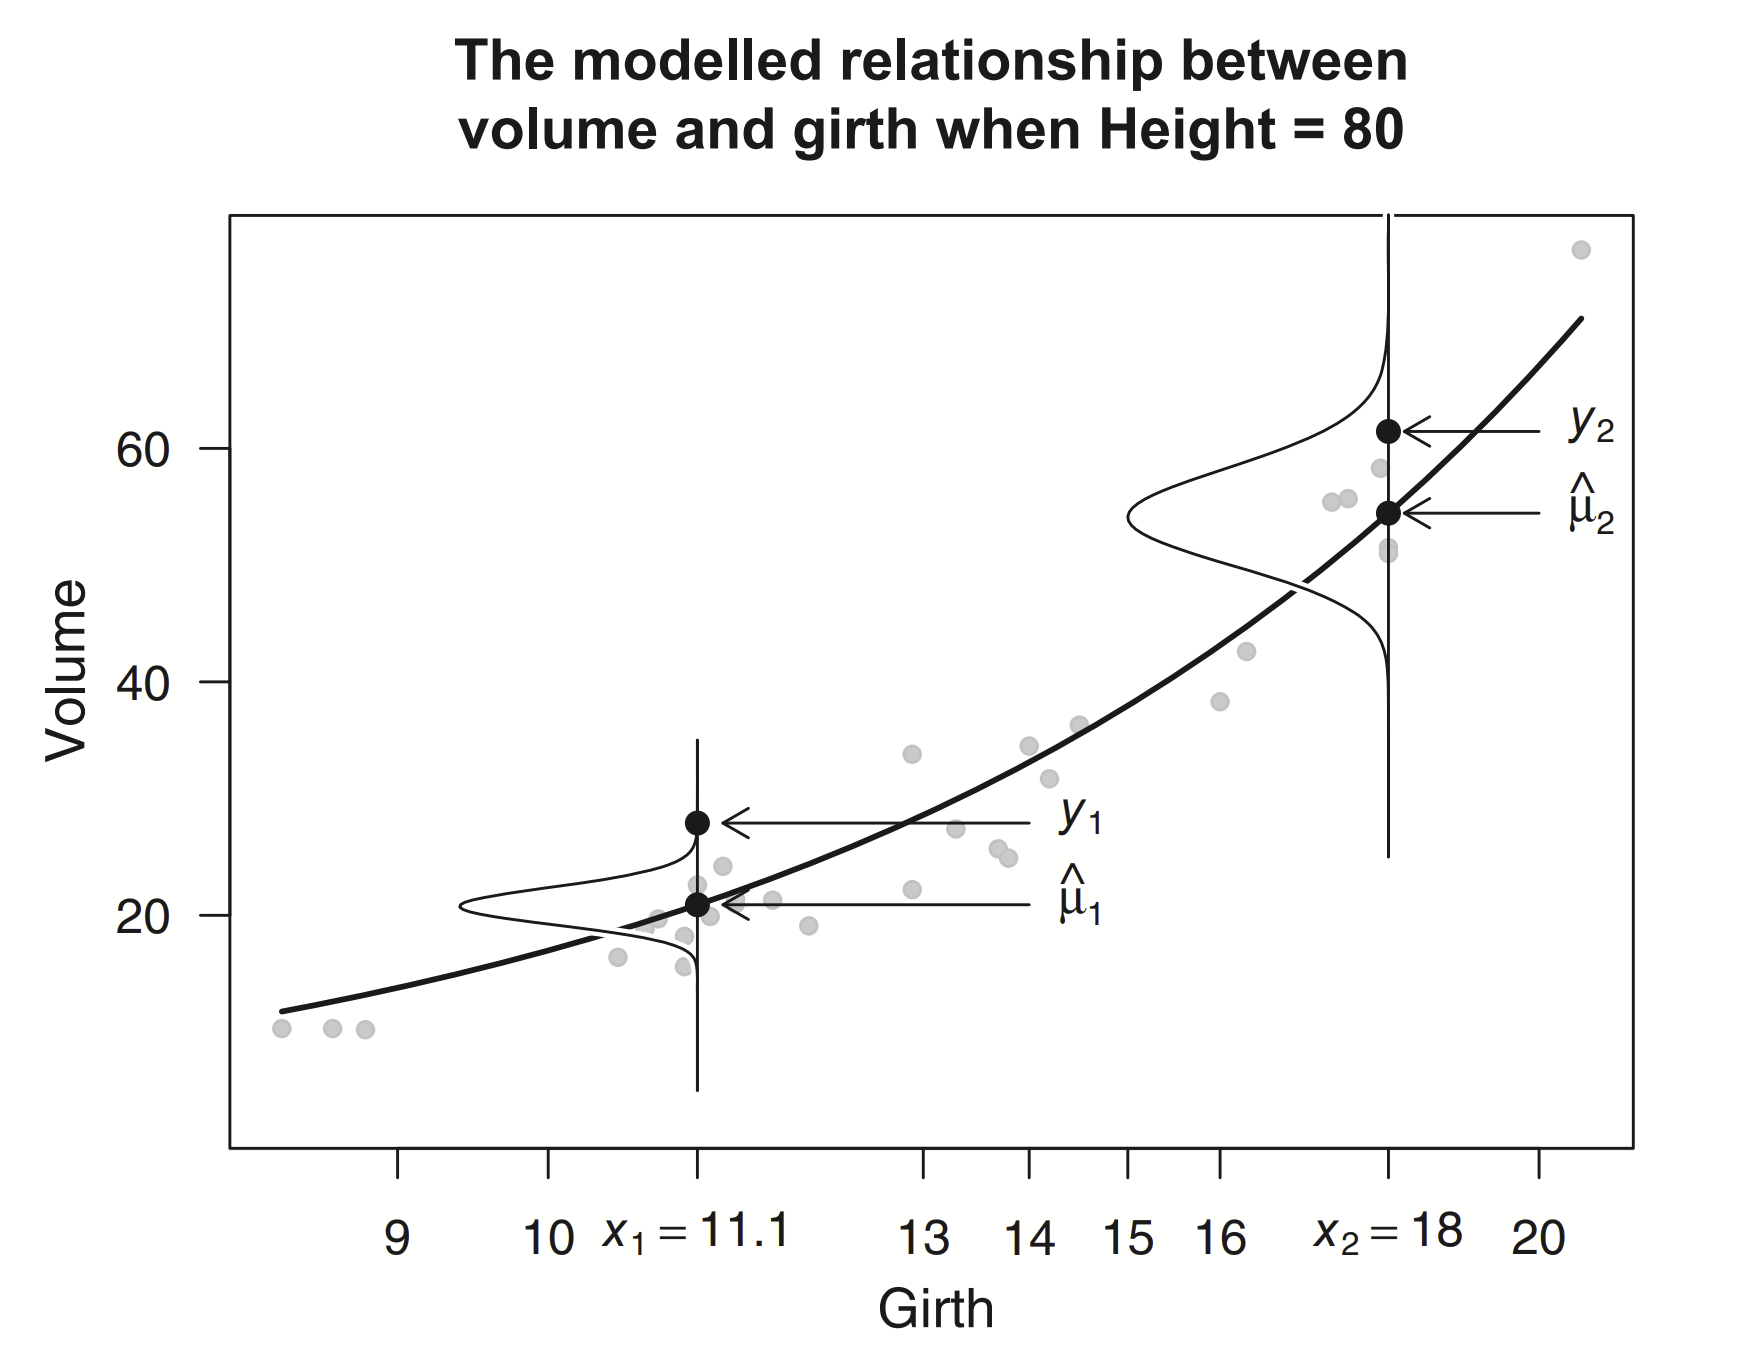







Back to Python

In [67]:
log_trees

,Girth,Height,Volume,log_Girth,log_Height,log_Volume
1,8.3,70.0,10.3,2.116256,4.248495,2.332144
2,8.6,65.0,10.3,2.151762,4.174387,2.332144
3,8.8,63.0,10.2,2.174752,4.143135,2.322388
4,10.5,72.0,16.4,2.351375,4.276666,2.797281
5,10.7,81.0,18.8,2.370244,4.394449,2.933857
6,10.8,83.0,19.7,2.379546,4.418841,2.980619
7,11.0,66.0,15.6,2.397895,4.189655,2.747271
8,11.0,75.0,18.2,2.397895,4.317488,2.901422
9,11.1,80.0,22.6,2.406945,4.382027,3.117950
10,11.2,75.0,19.9,2.415914,4.317488,2.990720


In [68]:
trees_m2 = smf.glm('Volume ~  Height + Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(trees_m2.summary())
trees_modeled['fitted2'] = trees_m2.fittedvalues
trees_modeled['r_deviance_std2'] = trees_m2.resid_deviance
trees_modeled['r_pearson_std2'] = trees_m2.resid_pearson
trees_modeled

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                       0.0094102
Method:                          IRLS   Log-Likelihood:                -71.590
Date:                Sun, 06 Apr 2025   Deviance:                      0.26247
Time:                        15:33:28   Pearson chi2:                    0.263
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0923      0.216      0.428      0.6

,Girth,Height,Volume,fitted,r_deviance_std,r_pearson_std,fitted2,r_deviance_std2,r_pearson_std2
1,8.3,70.0,10.3,16.441717,-2.178233,-1.875256,11.688319,-0.123837,-0.118778
2,8.6,65.0,10.3,16.396985,-2.176090,-1.874979,11.237820,-0.085894,-0.083452
3,8.8,63.0,10.2,16.463283,-2.249893,-1.930384,11.191845,-0.091384,-0.088622
4,10.5,72.0,16.4,19.339542,-0.802690,-0.760343,16.632598,-0.014050,-0.013984
5,10.7,81.0,18.8,20.608704,-0.465974,-0.452029,19.878164,-0.055251,-0.054239
6,10.8,83.0,19.7,21.008883,-0.333240,-0.326208,20.848995,-0.056157,-0.055110
7,11.0,66.0,15.6,19.470138,-1.085756,-1.009824,16.192331,-0.037037,-0.036581
8,11.0,75.0,18.2,20.426392,-0.566997,-0.545802,18.797781,-0.032144,-0.031801
9,11.1,80.0,22.6,21.172750,0.336512,0.343950,20.721181,0.088067,0.090671
10,11.2,75.0,19.9,20.757069,-0.209534,-0.206619,19.351986,0.028055,0.028318


/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


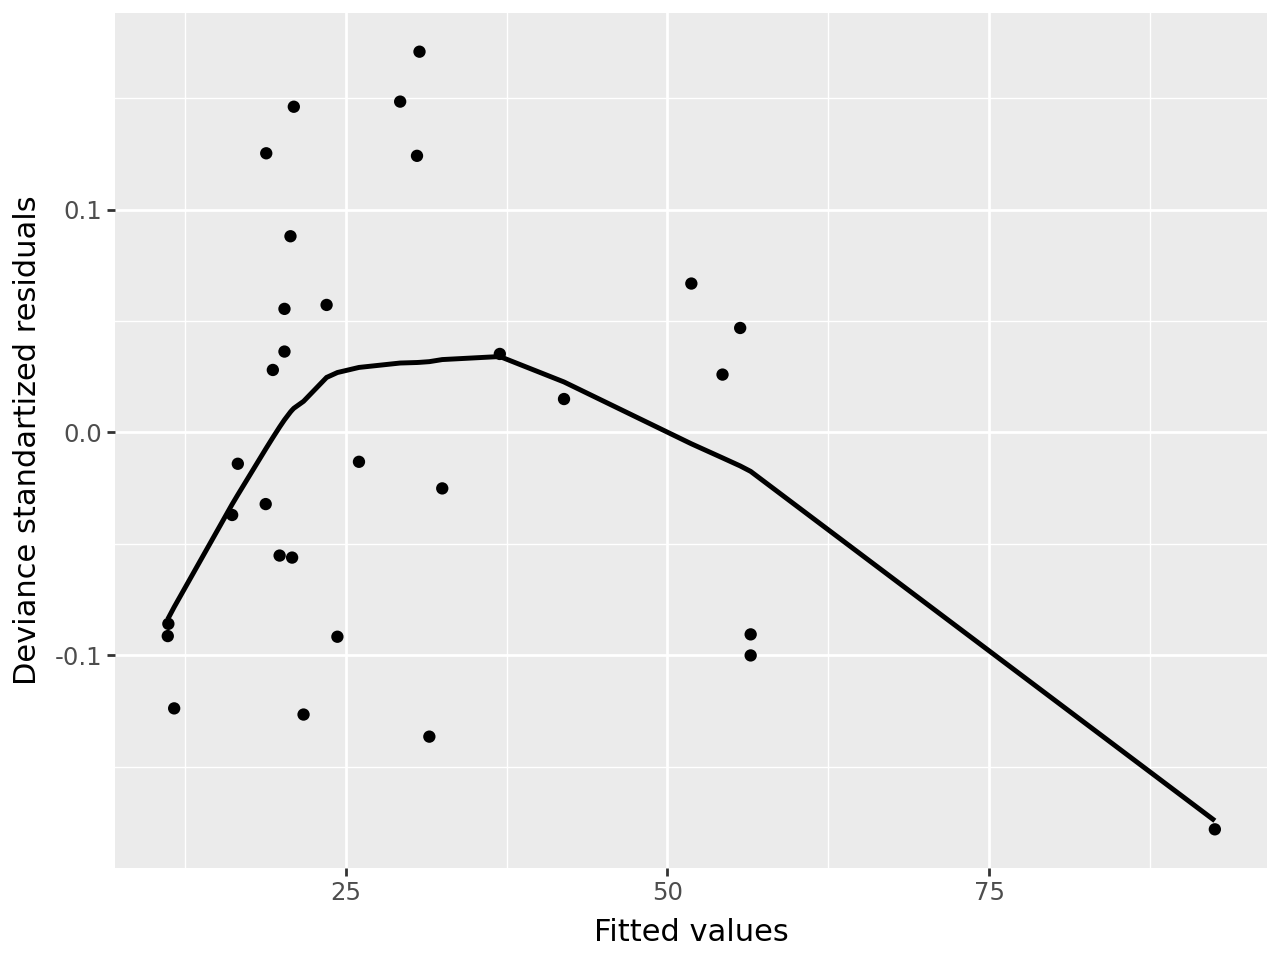

In [69]:
ggplot(trees_modeled, aes(x = trees_modeled['fitted2'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


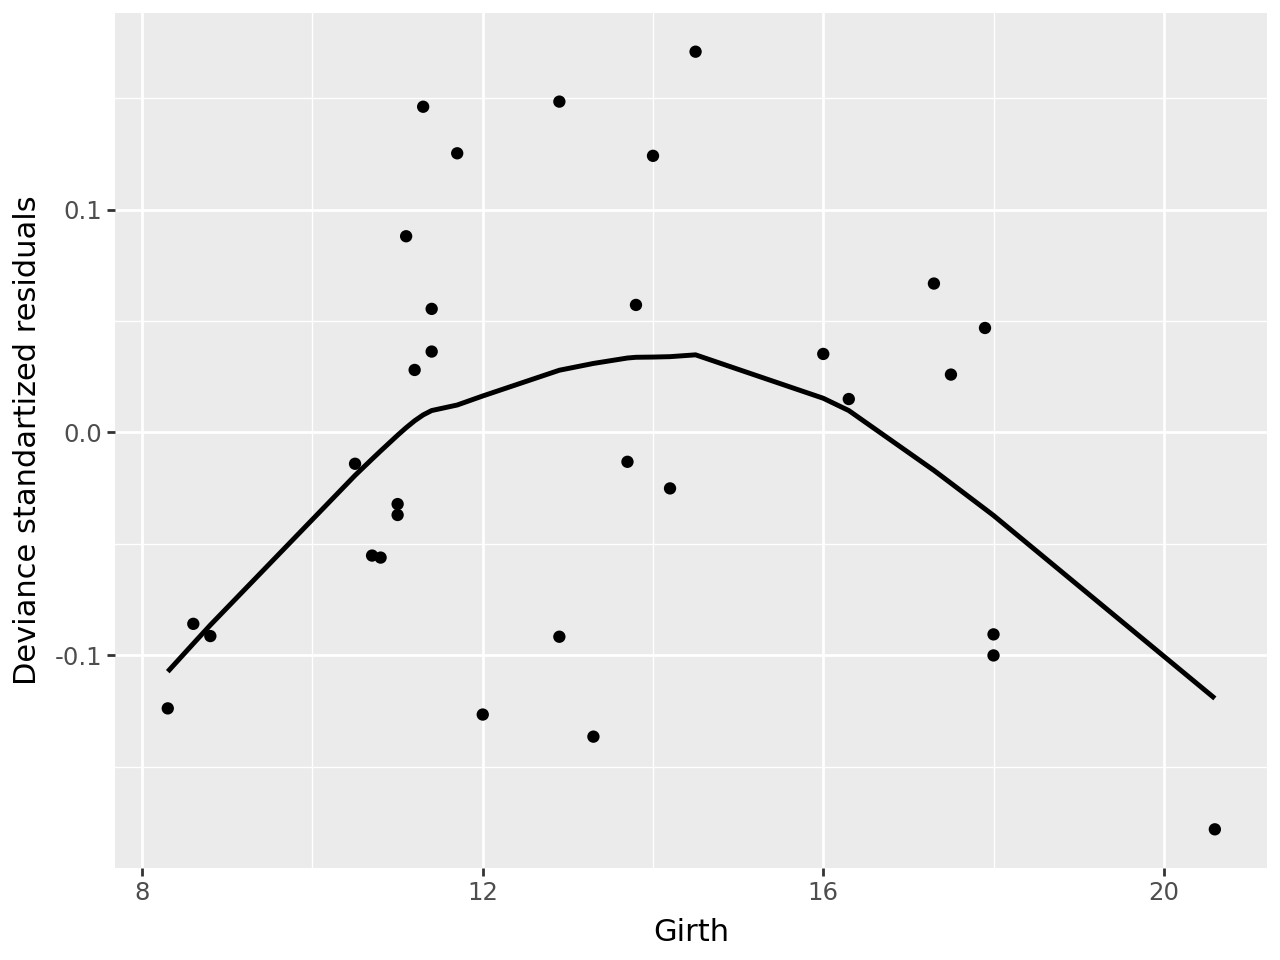

In [70]:
ggplot(trees_modeled, aes(x = trees_modeled['Girth'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Girth",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


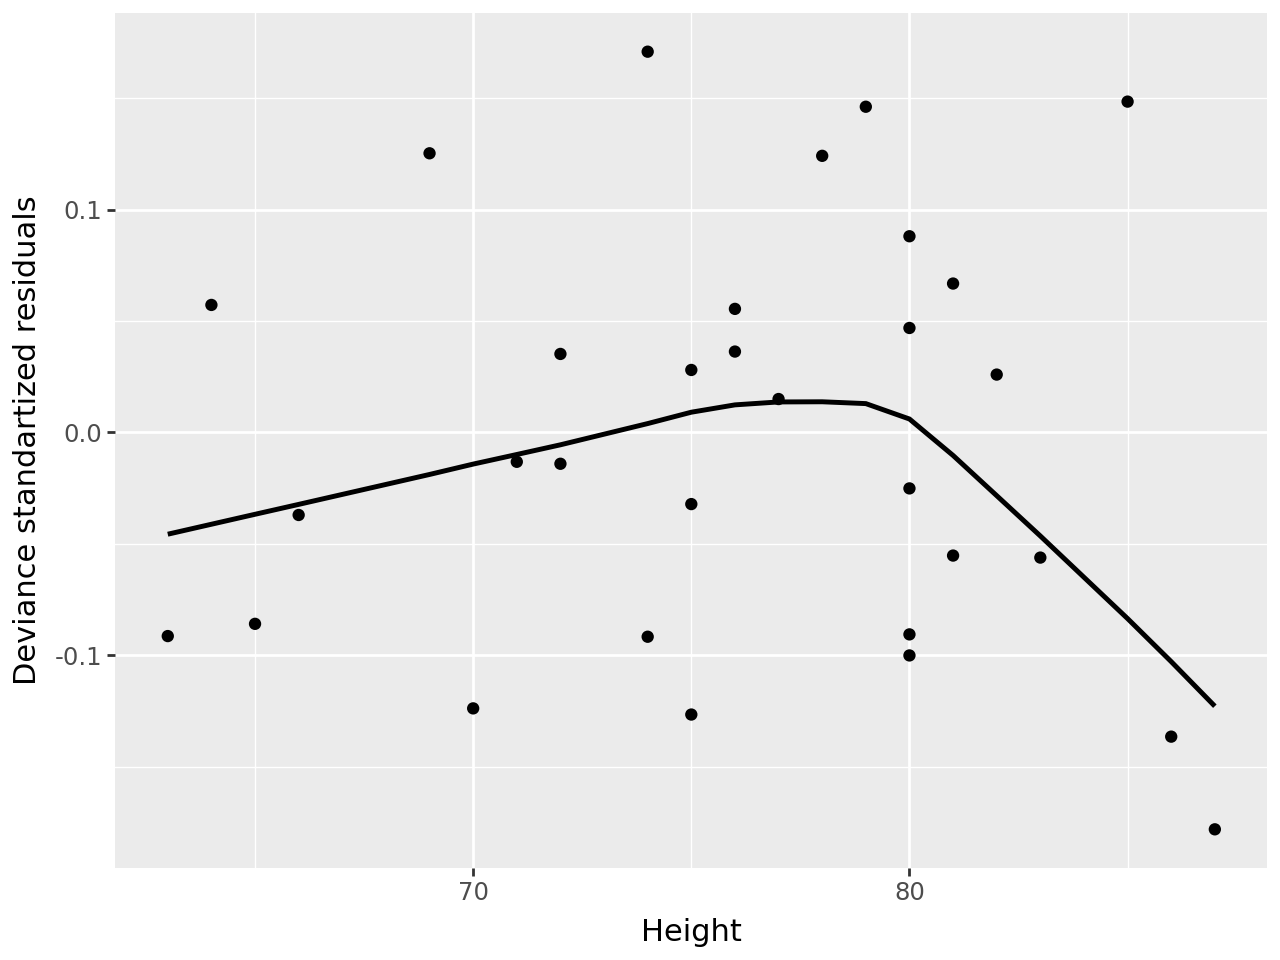

In [71]:
ggplot(trees_modeled, aes(x = trees_modeled['Height'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Height",
       y = "Deviance standartized residuals")

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [72]:
trees_m3 = smf.glm('Volume ~  log_Height + log_Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(trees_m3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                       0.0064273
Method:                          IRLS   Log-Likelihood:                -66.003
Date:                Sun, 06 Apr 2025   Deviance:                      0.18352
Time:                        15:33:29   Pearson chi2:                    0.180
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6911      0.788     -8.493      0.0

All covariates are significant in the model.



In [73]:
fitted3 = trees_m3.fittedvalues
r_deviance_std3 = trees_m3.resid_deviance
r_pearson_std3 = trees_m3.resid_pearson

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


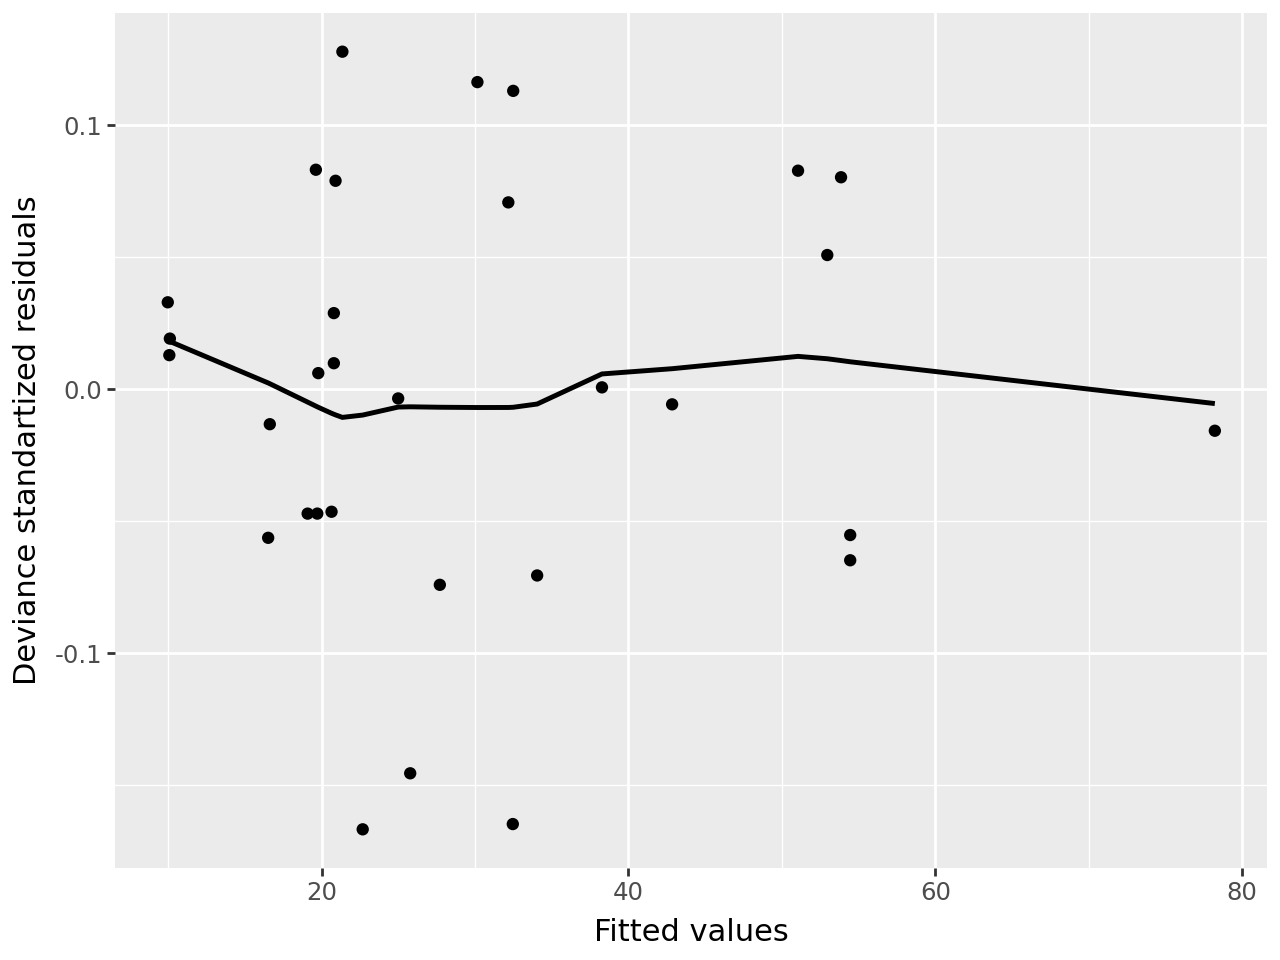

In [74]:
ggplot(trees_modeled, aes(x = fitted3, y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


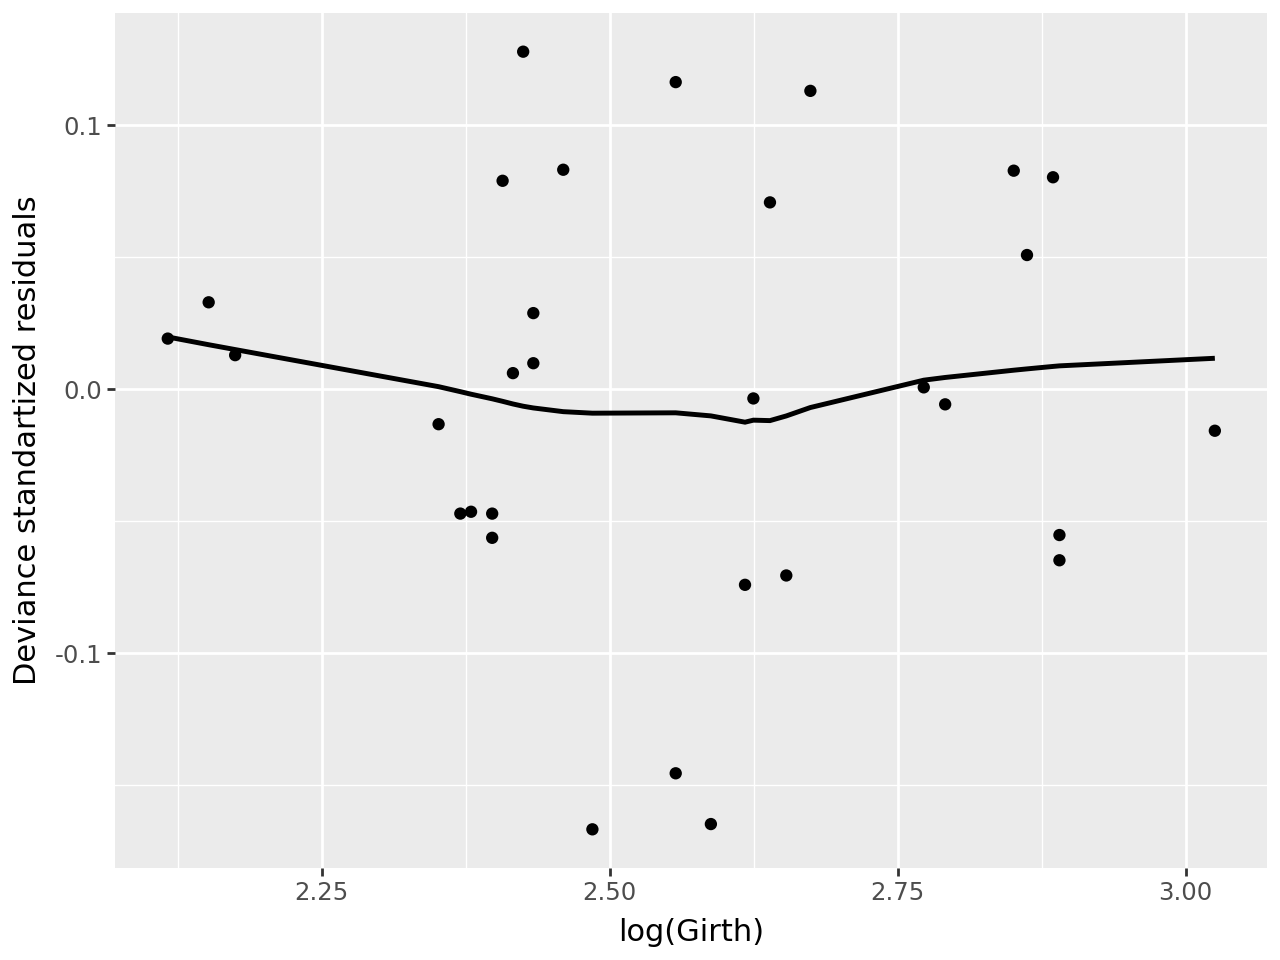

In [75]:
ggplot(trees_modeled, aes(x = log_trees['log_Girth'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Girth)",
       y = "Deviance standartized residuals")

/usr/local/lib/python3.11/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


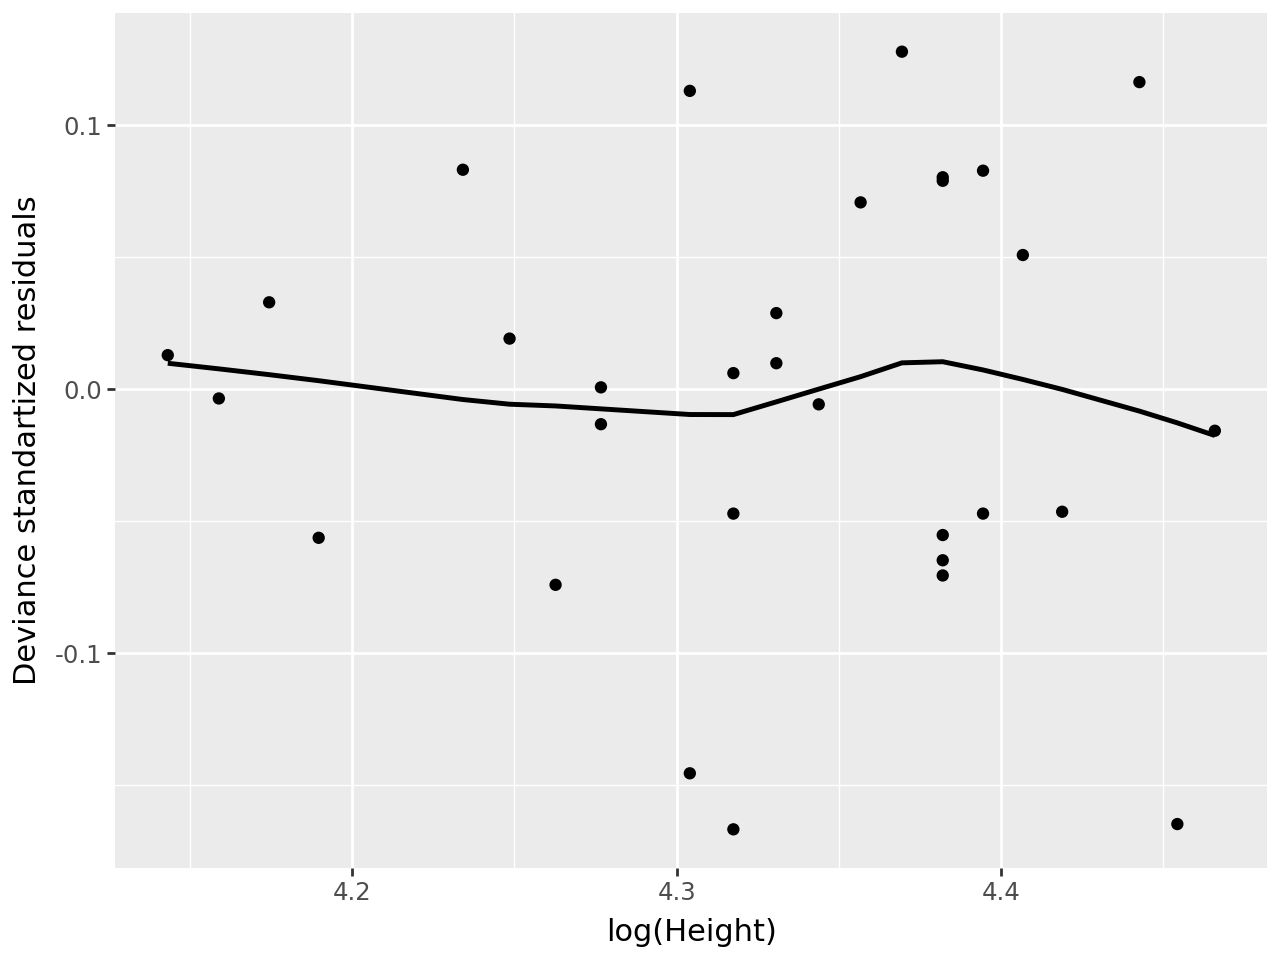

In [76]:
ggplot(trees_modeled, aes(x = log_trees['log_Height'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Height)",
       y = "Deviance standartized residuals")

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [77]:
AIC_1 = trees_m1.aic
AIC_2 = trees_m2.aic
AIC_3 = trees_m3.aic
print(AIC_1,AIC_2,AIC_3)

198.86982279572234 149.17995958700863 138.00600118739385


### Question:

* Are residuals from the model 3 normal?

In [78]:
r_anscombe = trees_m3.resid_anscombe_scaled
print(r_anscombe)

[ 0.2398519   0.41143769  0.16157351 -0.16482304 -0.58743949 -0.57876257
 -0.7019369  -0.58755253  0.98586067  0.07661602  1.5960345   0.12345412
  0.36032959  1.03808234 -2.07954762 -1.81484988  1.45223024 -2.05468442
 -0.92414383 -0.04308654  0.88375337 -0.87995421  1.41086284  0.00934558
 -0.07098211  1.03359055  0.6349358   1.00252095 -0.68883263 -0.80809153
 -0.19579718]


Check normality with test

In [79]:
stats.kstest(r_anscombe, 'norm')

KstestResult(statistic=np.float64(0.08093152364024483), pvalue=np.float64(0.9771507141064922), statistic_location=np.float64(-0.9241438328145343), statistic_sign=np.int8(-1))

In [80]:
stats.shapiro(r_anscombe)

ShapiroResult(statistic=np.float64(0.9608284901938606), pvalue=np.float64(0.3068224450540312))

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

In [81]:
influence = trees_m3.get_influence()
cooks = influence.cooks_distance

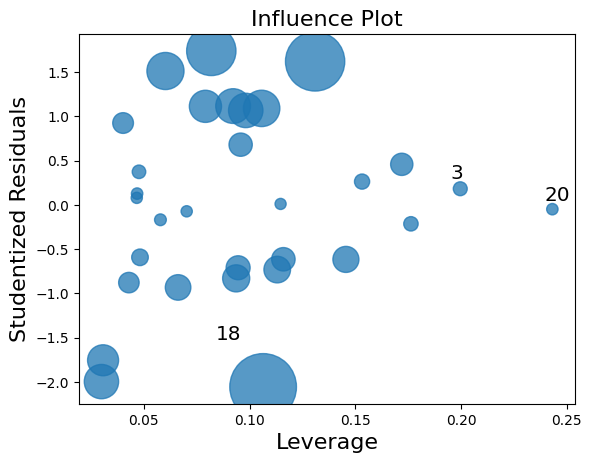

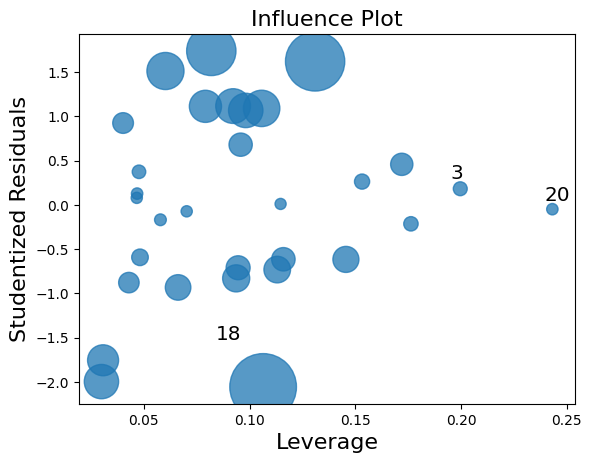

In [82]:
influence.plot_influence()

In [83]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

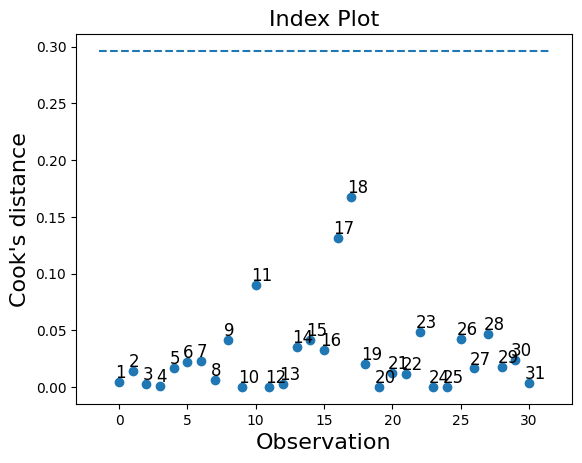

In [84]:
influence.plot_index()
abline(0, 8/(31-4))
plt.show()

In [85]:
hatvalues = trees_m3.get_hat_matrix_diag()

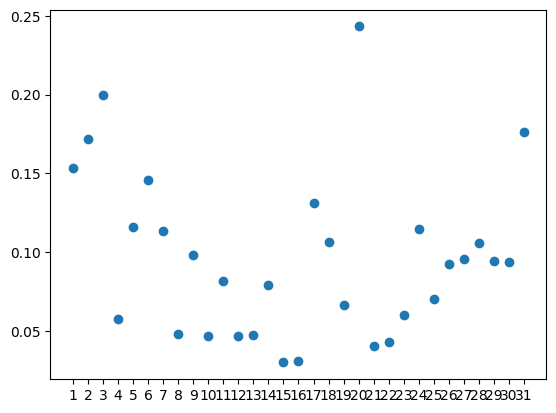

In [86]:
plt.scatter(log_trees.index, hatvalues)
plt.show()

In [87]:
influence = trees_m3.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_Intercept,dfb_log_Height,dfb_log_Girth,cooks_d,standard_resid,hat_diag,dffits_internal
1,0.015845,0.005200,-0.086103,0.004150,0.262323,0.153210,0.111183
2,0.127620,-0.095349,-0.085377,0.014469,0.457142,0.171984,0.207858
3,0.068294,-0.056528,-0.021257,0.002736,0.181386,0.199652,0.090492
4,-0.010658,0.004575,0.020967,0.000585,-0.169061,0.057849,-0.041807
5,0.142877,-0.167338,0.167266,0.016546,-0.615037,0.116000,-0.223037
6,0.183073,-0.207854,0.186352,0.021584,-0.616492,0.145569,-0.254875
7,-0.220389,0.203264,-0.028848,0.022738,-0.731449,0.113081,-0.261462
8,0.014424,-0.031946,0.079066,0.005930,-0.592832,0.048178,-0.133222
9,-0.211246,0.247962,-0.246801,0.041223,1.065736,0.098191,0.352007
10,-0.001492,0.003632,-0.009427,0.000101,0.078629,0.046655,0.017377


## Your Turn during exercise

Problem 8.6. from the book:


The standardized deviance residual $r^{DS}$ is approximately the reduction
in the residual deviance when Observation $i$ is omitted from the data. Demonstrate this by R code using the $trees$ data as follows.

* Fit the model m_1 as

  `data(trees)`
   `model_full <- glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees)`
 Compute the residual deviance, the Pearson estimate of $\phi$, and the standardized deviance residuals from this model.

* Omit Observation 1 from `trees`, and refit the model. Call this model
`model_omit_1`.

* Compute the difference between the residual deviance for the full model
`model_full` and for model `model_omit_1`. Show that this differences divided by the Pearson estimate of $\phi$ is approximately the standardized
deviance residuals squared.

* Repeat the above process for every observation $i$. At each iteration, call this model `model_omit_i`. Then, compute the difference between the deviance for the full model `model_full` and for model `model_omit_i`. Show that these differences divided by $\phi$ are approximately the standardized residuals squared.


## Analyse data of car accidents in Sweeden.

## Your Turn: HW 05

In [88]:
%%R -o cars
sweden2 <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden2.csv"
cars    <- read.table(sweden2, header = T, sep = ",")
summary(cars)
head(cars)



  Year Deaths Cars Fuel
1 1955    902  755 1531
2 1956    889  855 1657
3 1957    946  987 1738
4 1958    941 1098 1893
5 1959   1000 1216 2011
6 1960   1036 1324 2127


*Dataset* contains the number of deaths, he number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

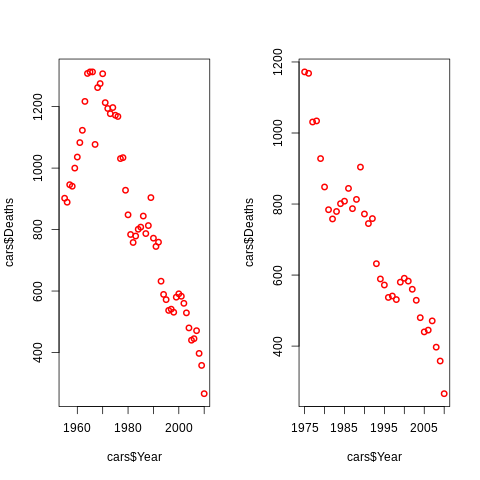

In [89]:
%%R
par(mfrow=c(1,2))
plot(cars$Deaths~cars$Year, col="red", lwd=2)
cars <- cars[cars$Year>1974,]
plot(cars$Deaths~cars$Year, col="red", lwd=2)

# INITIAL ANALYSIS


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
from patsy import dmatrices

In [112]:
import pandas as pd

url = "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden2.csv"
cars = pd.read_csv(url)

# consider only cars made after 1975
cars = cars[cars['Year'] >= 1975].copy()

cars.head()

,Year,Deaths,Cars,Fuel
20,1975,1172,2931,4383
21,1976,1168,3060,4624
22,1977,1031,3039,4811
23,1978,1034,3042,4945
24,1979,928,3059,4913


In [113]:
cars.describe()

,Year,Deaths,Cars,Fuel
count,36.000000,36.000000,36.000000,36.000000
mean,1992.500000,689.916667,3891.666667,5264.250000
std,10.535654,220.272866,622.931640,422.352958
min,1975.000000,266.000000,2931.000000,4383.000000
25%,1983.750000,535.500000,3284.250000,4896.000000
50%,1992.500000,688.500000,3918.500000,5392.500000
75%,2001.250000,809.250000,4438.000000,5580.250000
max,2010.000000,1172.000000,4884.000000,5910.000000


In [114]:
print("\nMissing values:\n", cars.isnull().sum())



Missing values:
 Year      0
Deaths    0
Cars      0
Fuel      0
dtype: int64


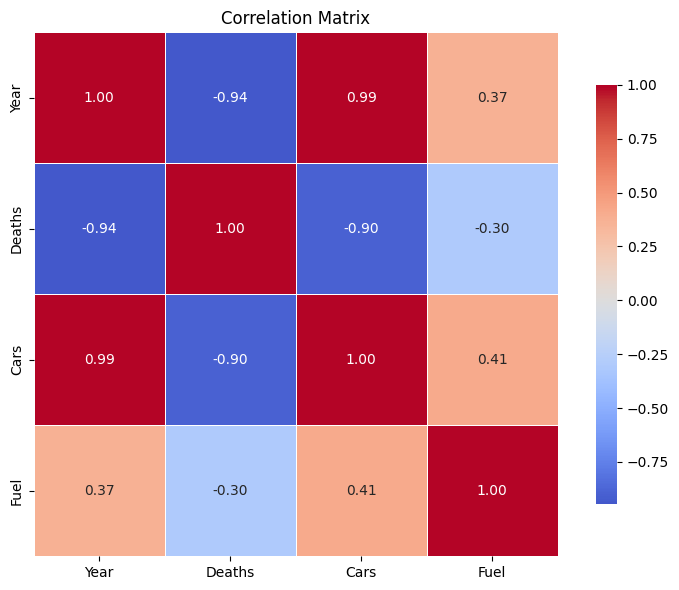

In [115]:
# Compute correlation matrix
corr = cars.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

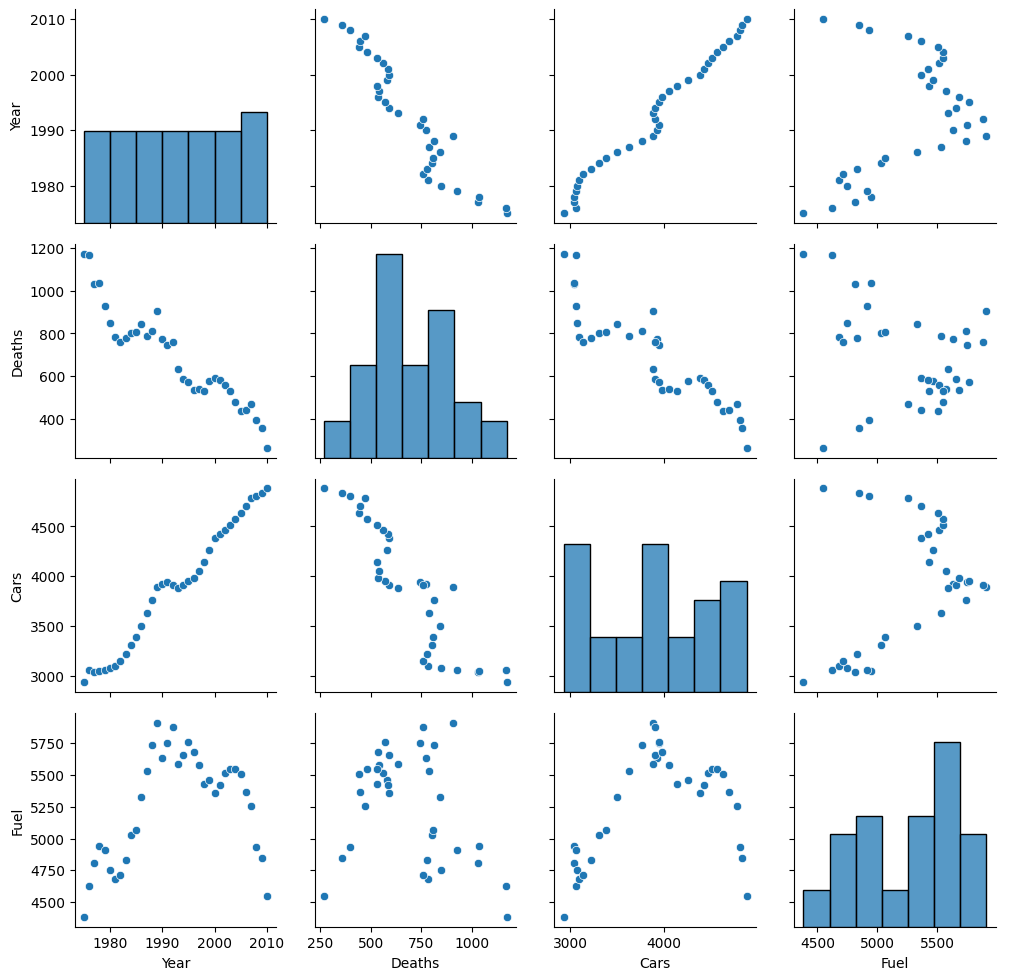

In [116]:
g = sns.PairGrid(cars)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Tasks

* Find the best posssible model. Try add all varariables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components.
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.


# FIND BEST MODEL POSSIBLE

In [127]:
# Model 0: Intercept only (null model)
m0 = smf.glm('Deaths ~ 1',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m0.summary())
print()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       35
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1386.5
Date:                Sun, 06 Apr 2025   Deviance:                       2473.4
Time:                        17:49:04   Pearson chi2:                 2.46e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          1.266e-14
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5366      0.006   1030.148      0.0

In [124]:
# Model 1: Additive main effects
m1 = smf.glm('Deaths ~ Cars + Fuel + Year',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m1.summary())
print()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       32
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.75
Date:                Sun, 06 Apr 2025   Deviance:                       81.904
Time:                        17:48:57   Pearson chi2:                     80.4
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.9859      8.178     18.830      0.0

In [128]:
# Model 2: Add 2nd order interaction terms
m2 = smf.glm('Deaths ~ Cars * Fuel + Cars * Year + Fuel * Year',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       29
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.85
Date:                Sun, 06 Apr 2025   Deviance:                       58.102
Time:                        17:50:59   Pearson chi2:                     58.1
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.3051     90.421      2.945      0.0

In [129]:
# Model 3: Add 2nd order interaction terms
m3 = smf.glm('Deaths ~ Cars * Year + Fuel * Year',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.88
Date:                Sun, 06 Apr 2025   Deviance:                       58.157
Time:                        17:51:01   Pearson chi2:                     58.1
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    245.9437     25.484      9.651      0.0

In [134]:
# Model 4: Add 2nd order interaction terms
m4 = smf.glm('Deaths ~ Cars * Fuel + Fuel * Year',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -178.94
Date:                Sun, 06 Apr 2025   Deviance:                       58.271
Time:                        17:52:08   Pearson chi2:                     58.2
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    266.8337     90.440      2.950      0.0

In [143]:
# Model 5: Add 2nd order interaction terms
m5 = smf.glm('Deaths ~ Fuel * Year',
             data=cars,
             family=sm.families.Poisson()).fit()
print(m5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   36
Model:                            GLM   Df Residuals:                       32
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -231.05
Date:                Sun, 06 Apr 2025   Deviance:                       162.49
Time:                        17:54:10   Pearson chi2:                     162.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.6948     20.723      8.478      0.0

In [145]:
print("Model 0 (Intercept only) AIC:", m0.aic)
print("Model 1 (Additive main effects) AIC:", m1.aic)
print("Model 2 (2nd order interactions) AIC:", m2.aic)
print("Model 3 (Cars * Year + Fuel * Year) AIC:", m3.aic, "<--- BEST")
print("Model 4 (Cars * Fuel + Fuel * Year) AIC:", m4.aic)
print("Model 5 (Fuel * Yearl) AIC:", m5.aic)

Model 0 (Intercept only) AIC: 2774.9972235628375
Model 1 (Additive main effects) AIC: 389.5079221515489
Model 2 (2nd order interactions) AIC: 371.70587240887335
Model 3 (Cars * Year + Fuel * Year) AIC: 369.7609657044268 <--- BEST
Model 4 (Cars * Fuel + Fuel * Year) AIC: 369.87543097070056
Model 5 (Fuel * Yearl) AIC: 470.09075288346594


In [174]:
best_model = m3
best_model_spec_str = 'Deaths ~ Cars * Year + Fuel * Year'

# ANALYSE RESIDUALS


In [199]:
residuals_df = compute_residuals(best_model)  # using function defined somewhere above in lecture code
residuals_df.head()

,Original_Values,Predicted_Values,Working_Residuals,Pearson_Residuals,Pearson_Standardized_Residuals,Deviance_Residuals,Deviance_Standardized_Residuals
20,1172.0,1155.955005,0.013880,0.471921,0.660750,0.470835,0.659230
21,1168.0,1176.496404,-0.007222,-0.247708,-0.305224,-0.248007,-0.305593
22,1031.0,1063.331785,-0.030406,-0.991506,-1.106656,-0.996595,-1.112336
23,1034.0,983.573992,0.051268,1.607871,1.931142,1.594417,1.914984
24,928.0,924.706128,0.003562,0.108319,0.121818,0.108255,0.121746


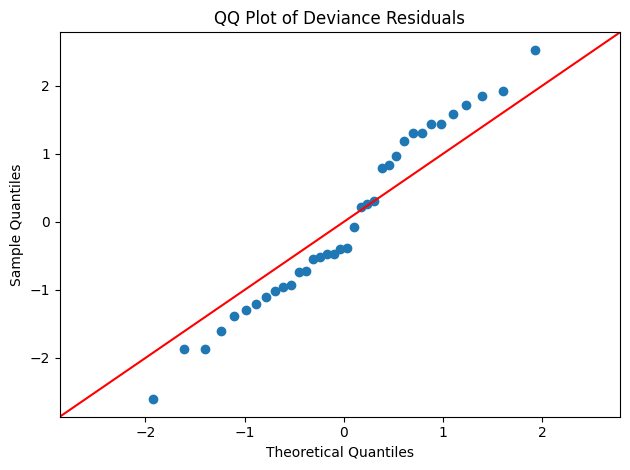

In [197]:
# QQ Plot of Deviance Residuals
sm.qqplot(residuals_df["Deviance_Residuals"], line='45')
plt.title("QQ Plot of Deviance Residuals")
plt.tight_layout()
plt.show()



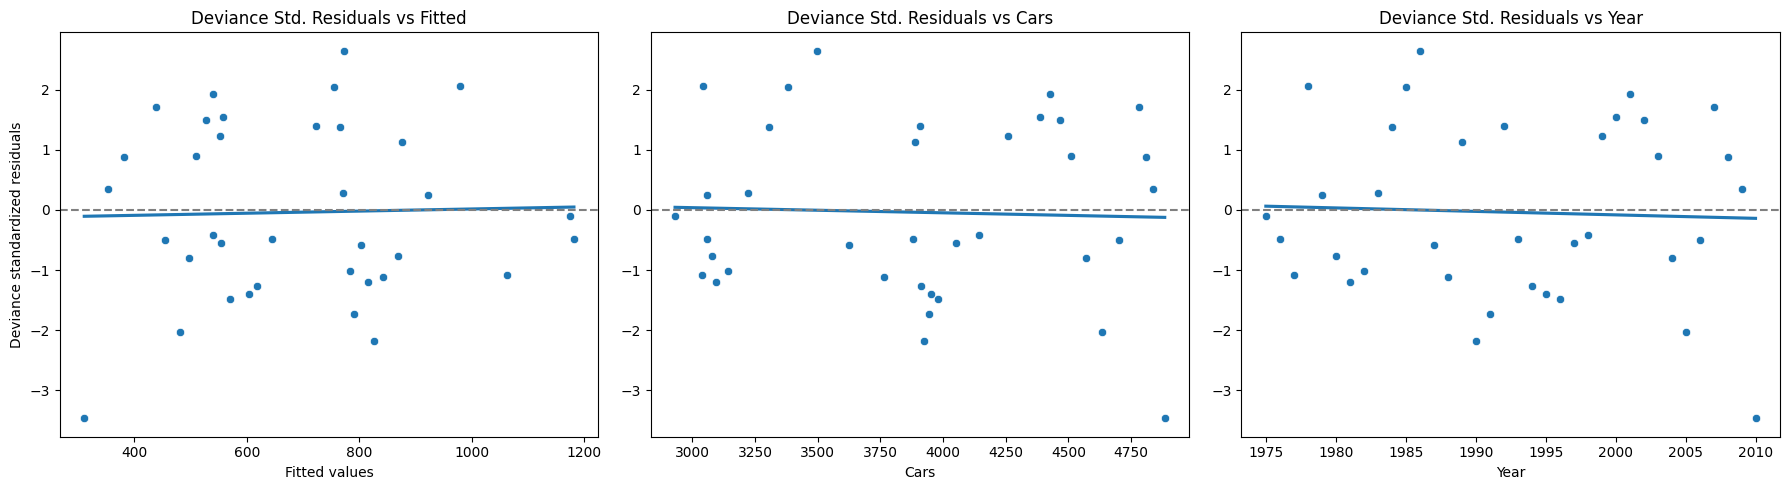

In [160]:
# chatgpt generated code based on example in R somewhere above in code

import matplotlib.pyplot as plt
import seaborn as sns

# Merge residuals into the main data
cars_with_resid = cars.copy()
cars_with_resid["fitted"] = residuals_df["Predicted_Values"]
cars_with_resid["r_deviance_std"] = residuals_df["Deviance_Standardized_Residuals"]

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Fitted values
sns.scatterplot(ax=axes[0], data=cars_with_resid,
                x="fitted", y="r_deviance_std")
sns.regplot(ax=axes[0], data=cars_with_resid,
            x="fitted", y="r_deviance_std", scatter=False, ci=None)
axes[0].axhline(0, linestyle="--", color="gray")
axes[0].set_title("Deviance Std. Residuals vs Fitted")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Deviance standardized residuals")

# 2. Residuals vs Cars
sns.scatterplot(ax=axes[1], data=cars_with_resid,
                x="Cars", y="r_deviance_std")
sns.regplot(ax=axes[1], data=cars_with_resid,
            x="Cars", y="r_deviance_std", scatter=False, ci=None)
axes[1].axhline(0, linestyle="--", color="gray")
axes[1].set_title("Deviance Std. Residuals vs Cars")
axes[1].set_ylabel("")

# 3. Residuals vs Year
sns.scatterplot(ax=axes[2], data=cars_with_resid,
                x="Year", y="r_deviance_std")
sns.regplot(ax=axes[2], data=cars_with_resid,
            x="Year", y="r_deviance_std", scatter=False, ci=None)
axes[2].axhline(0, linestyle="--", color="gray")
axes[2].set_title("Deviance Std. Residuals vs Year")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


**DISPERSION CHECK**

Dispersion value	Meaning
- ≈ 1.0	Perfectly fine for Poisson
- 1.2 - 1.5	Mild overdispersion, may be tolerable
- 1.9+ Moderate to strong overdispersion
- 2.0	Likely need a different model (e.g. NegBin)

In [164]:
# Deviance-based dispersion
dispersion_deviance = best_model.deviance / best_model.df_resid

# Pearson-based dispersion
pearson_residuals = (best_model.model.endog - best_model.fittedvalues) / np.sqrt(best_model.fittedvalues)
dispersion_pearson = np.sum(pearson_residuals**2) / best_model.df_resid

print(f"Deviance-based dispersion: {dispersion_deviance:.3f}")
print(f"Pearson-based dispersion:  {dispersion_pearson:.3f}")


# ❌ - is this necesarry? values show overdispersion


Deviance-based dispersion: 1.939
Pearson-based dispersion:  1.937


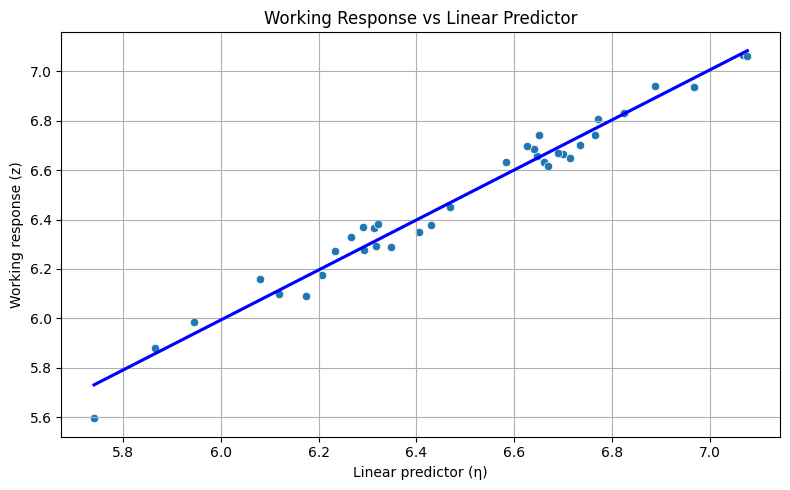

In [161]:
# Extract the design matrix (X) and coefficients (beta)
X = best_model.model.exog
beta = best_model.params

# Compute linear predictor η = Xβ
eta_hat = X @ beta

# Already available:
mu_hat = best_model.fittedvalues
y_obs = best_model.model.endog
g_prime = 1 / mu_hat

# Compute working response
z_i = eta_hat + g_prime * (y_obs - mu_hat)

# Plot working response vs linear predictor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=eta_hat, y=z_i)
sns.regplot(x=eta_hat, y=z_i, scatter=False, ci=None, color='blue')
plt.xlabel("Linear predictor (η)")
plt.ylabel("Working response (z)")
plt.title("Working Response vs Linear Predictor")
plt.grid(True)
plt.tight_layout()
plt.show()


Diagnostic checks if the linear predictor (the right-hand side of GLM) captures the systematic pattern in the data.

- x-axis: the linear predictor η=Xβη=Xβ

- y-axis: the working response zi=ηi+g′(μi)(yi−μi)zi​=ηi​+g′(μi​)(yi​−μi​)

---


**Results in the above graph:**
*   The points fall very tightly around the regression line.
*   There is no visible curvature or systematic deviation.

It suggests that the choice of:

- Link function (log)
- Predictors and interactions

is likely **appropriate** for the structure in the data. 😀


---
RESULTS SO FAR

✅ Residuals vs fitted	Looked good — no major non-random patterns

✅ Residuals vs predictors	No strong trends indicating misspecification

✅ Working response vs linear predictor	Tight alignment — suggests linear predictor is doing its job

✅ QQ plots	Acceptable for Poisson; no major violations

❌ Dispersion check	~1.94 → high, but not necessarily because of bad linear predictor

---

# INCORECT LINEAR PREDICTORS - did not appear


Nothing here, no clear systematic components left unaccounted for.

# INFLUENCE OBSERVATIONS ANALYSIS - COOK DISTANCE


In [172]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Get influence measures from best_model
influence = best_model.get_influence()

# Leverage (hat values)
hat_values = influence.hat_matrix_diag

# Cook's distance
cooks_d = influence.cooks_distance[0]

# Standardized deviance residuals (from residuals_df)
std_resid = residuals_df["Deviance_Standardized_Residuals"]

# Merge into a dataframe
influence_df = cars.copy()
influence_df["Index"] = influence_df.index
influence_df["Hat"] = hat_values
influence_df["CooksD"] = cooks_d
influence_df["Std_Deviance_Residual"] = std_resid


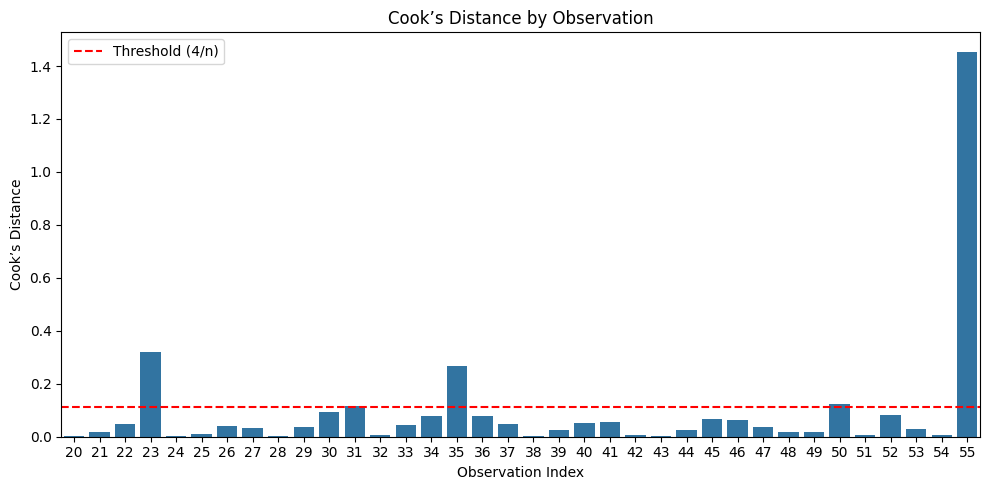

In [173]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Index", y="CooksD", data=influence_df)
plt.axhline(4 / len(cars), color="red", linestyle="--", label="Threshold (4/n)")
plt.title("Cook’s Distance by Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook’s Distance")
plt.legend()
plt.tight_layout()
plt.show()


In [171]:
n = len(cars)
influential = influence_df[
    (influence_df["CooksD"] > 4 / n) |
    (influence_df["Hat"] > 2 * hat_values.mean()) |
    (influence_df["Std_Deviance_Residual"].abs() > 2)
]

print("Influential observations:")
display(influential[["Index", "Year", "Deaths", "Hat", "CooksD", "Std_Deviance_Residual"]])


Influential observations:


,Index,Year,Deaths,Hat,CooksD,Std_Deviance_Residual
20,20,1975,1172,0.467922,0.001638,-0.105741
21,21,1976,1168,0.338365,0.019184,-0.475310
23,23,1978,1034,0.305147,0.318510,2.067188
30,30,1985,808,0.116708,0.093963,2.042006
31,31,1986,844,0.087452,0.115434,2.648464
35,35,1990,772,0.256371,0.265294,-2.172479
50,50,2005,440,0.156146,0.124121,-2.035315
55,55,2010,266,0.433407,1.454579,-3.464277


TRY TO REFIT MODEL WITHOUT THE MOST INFLUENTIAL DATA

In [190]:
cars_no_55 = cars.drop(index=55)

refit_model = smf.glm(
    best_model_spec_str,
    data=cars_no_55,
    family=sm.families.Poisson()
).fit()
print(refit_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Deaths   No. Observations:                   35
Model:                            GLM   Df Residuals:                       29
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -169.33
Date:                Sun, 06 Apr 2025   Deviance:                       46.482
Time:                        19:05:02   Pearson chi2:                     46.7
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    205.8661     28.062      7.336      0.0

In [185]:
print("AIC without obs 55:", refit_model.aic)

AIC without obs 55: 350.6637234803202 <----- BETTER THAN BEFORE WITHOUT THE OUTLIER


AIC is better after removing the outlier - using model without it as the best model

In [200]:
best_model = refit_model

## REPEAT ANALISIS OF THE MODEL WITHOUT OUTLIER (55)

In [201]:
residuals_df = compute_residuals(best_model)  # using function defined somewhere above in lecture code
residuals_df.head()

,Original_Values,Predicted_Values,Working_Residuals,Pearson_Residuals,Pearson_Standardized_Residuals,Deviance_Residuals,Deviance_Standardized_Residuals
20,1172.0,1155.955005,0.013880,0.471921,0.660750,0.470835,0.659230
21,1168.0,1176.496404,-0.007222,-0.247708,-0.305224,-0.248007,-0.305593
22,1031.0,1063.331785,-0.030406,-0.991506,-1.106656,-0.996595,-1.112336
23,1034.0,983.573992,0.051268,1.607871,1.931142,1.594417,1.914984
24,928.0,924.706128,0.003562,0.108319,0.121818,0.108255,0.121746


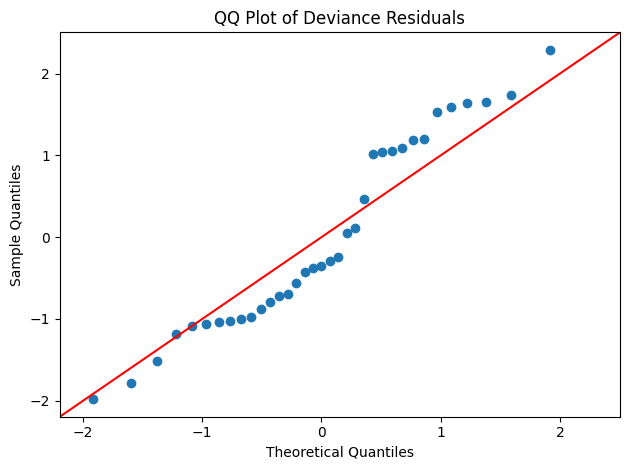

In [202]:
# QQ Plot of Deviance Residuals
sm.qqplot(residuals_df["Deviance_Residuals"], line='45')
plt.title("QQ Plot of Deviance Residuals")
plt.tight_layout()
plt.show()



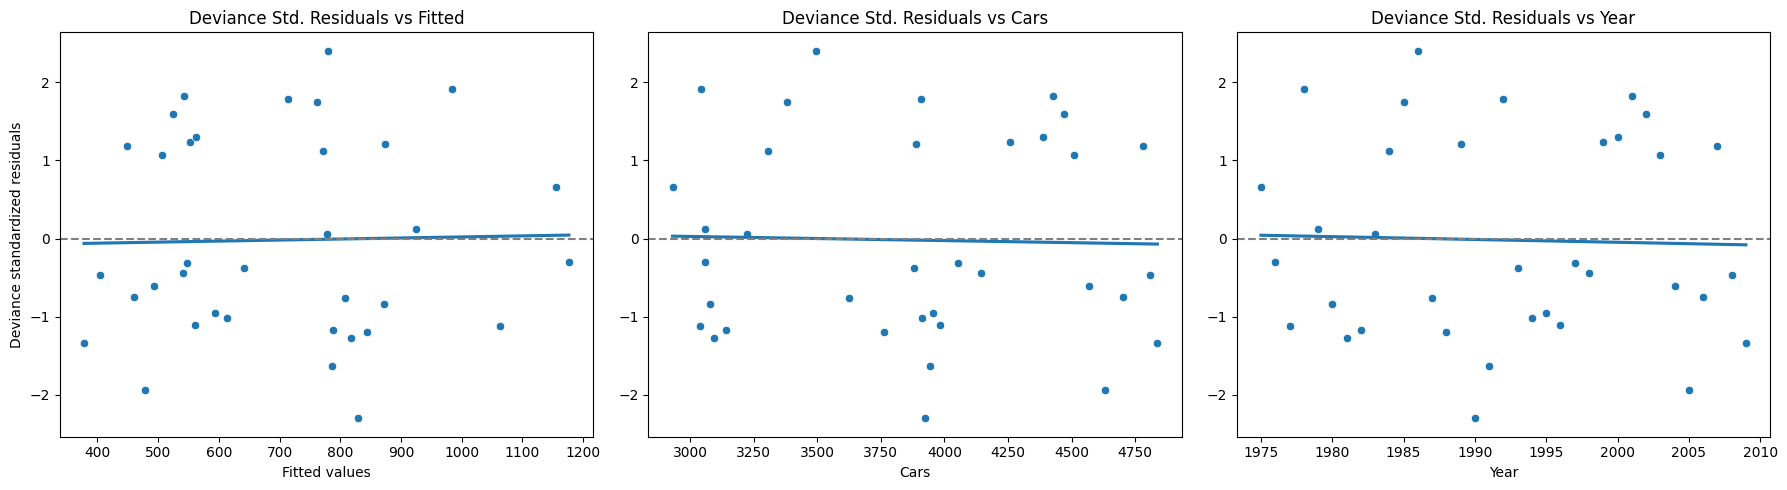

In [203]:
# chatgpt generated code based on example in R somewhere above in code

import matplotlib.pyplot as plt
import seaborn as sns

# Merge residuals into the main data
cars_with_resid = cars.copy()
cars_with_resid["fitted"] = residuals_df["Predicted_Values"]
cars_with_resid["r_deviance_std"] = residuals_df["Deviance_Standardized_Residuals"]

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residuals vs Fitted values
sns.scatterplot(ax=axes[0], data=cars_with_resid,
                x="fitted", y="r_deviance_std")
sns.regplot(ax=axes[0], data=cars_with_resid,
            x="fitted", y="r_deviance_std", scatter=False, ci=None)
axes[0].axhline(0, linestyle="--", color="gray")
axes[0].set_title("Deviance Std. Residuals vs Fitted")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Deviance standardized residuals")

# 2. Residuals vs Cars
sns.scatterplot(ax=axes[1], data=cars_with_resid,
                x="Cars", y="r_deviance_std")
sns.regplot(ax=axes[1], data=cars_with_resid,
            x="Cars", y="r_deviance_std", scatter=False, ci=None)
axes[1].axhline(0, linestyle="--", color="gray")
axes[1].set_title("Deviance Std. Residuals vs Cars")
axes[1].set_ylabel("")

# 3. Residuals vs Year
sns.scatterplot(ax=axes[2], data=cars_with_resid,
                x="Year", y="r_deviance_std")
sns.regplot(ax=axes[2], data=cars_with_resid,
            x="Year", y="r_deviance_std", scatter=False, ci=None)
axes[2].axhline(0, linestyle="--", color="gray")
axes[2].set_title("Deviance Std. Residuals vs Year")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


**DISPERSION CHECK**

Dispersion value	Meaning
- ≈ 1.0	Perfectly fine for Poisson
- 1.2 - 1.5	Mild overdispersion, may be tolerable
- 1.9+ Moderate to strong overdispersion
- 2.0	Likely need a different model (e.g. NegBin)

In [204]:
# Deviance-based dispersion
dispersion_deviance = best_model.deviance / best_model.df_resid

# Pearson-based dispersion
pearson_residuals = (best_model.model.endog - best_model.fittedvalues) / np.sqrt(best_model.fittedvalues)
dispersion_pearson = np.sum(pearson_residuals**2) / best_model.df_resid

print(f"Deviance-based dispersion: {dispersion_deviance:.3f}")
print(f"Pearson-based dispersion:  {dispersion_pearson:.3f}")


Deviance-based dispersion: 1.603
Pearson-based dispersion:  1.609


🥳 **DISPERSION IS LOWER WITHOUT THE 55 observation INCLUDED** ❗❗❗❗❗❗❗❗

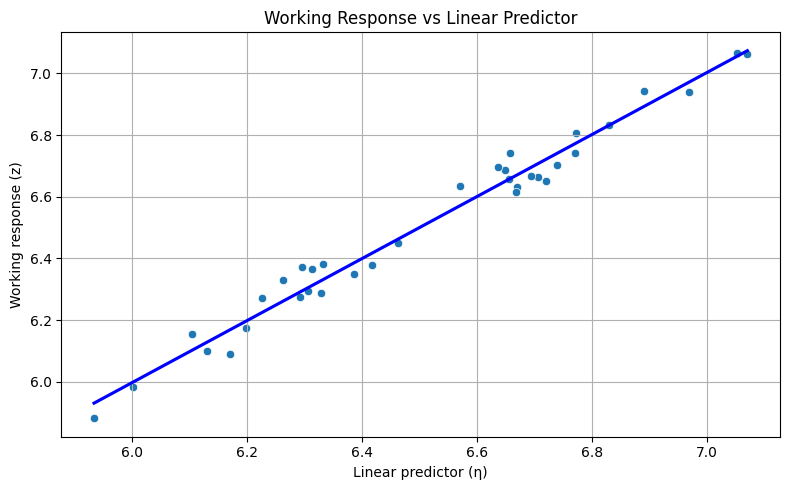

In [205]:
# Extract the design matrix (X) and coefficients (beta)
X = best_model.model.exog
beta = best_model.params

# Compute linear predictor η = Xβ
eta_hat = X @ beta

# Already available:
mu_hat = best_model.fittedvalues
y_obs = best_model.model.endog
g_prime = 1 / mu_hat

# Compute working response
z_i = eta_hat + g_prime * (y_obs - mu_hat)

# Plot working response vs linear predictor
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=eta_hat, y=z_i)
sns.regplot(x=eta_hat, y=z_i, scatter=False, ci=None, color='blue')
plt.xlabel("Linear predictor (η)")
plt.ylabel("Working response (z)")
plt.title("Working Response vs Linear Predictor")
plt.grid(True)
plt.tight_layout()
plt.show()


# FIT MODEL WITHOUT LAST 5 OBSERVATIONS and try to PREDICT THEM

In [206]:
#  use cars without the observation 55 as its an outlier
# Sort by year just in case
cars_sorted = cars_no_55.sort_values("Year").reset_index(drop=True)

# Split into train (all but last 5) and test (last 5)
train = cars_sorted.iloc[:-5].copy()
test = cars_sorted.iloc[-5:].copy()

# Fit the model on training data
model_train = smf.glm(
    best_model_spec_str,
    data=train,
    family=sm.families.Poisson()
).fit()

# Predict on test data
test["Predicted_Deaths"] = model_train.predict(test)

test["Difference"] = abs(test["Predicted_Deaths"]-test["Deaths"])

# Compare predicted vs observed
print(test[["Year", "Deaths", "Predicted_Deaths", "Difference"]])


    Year  Deaths  Predicted_Deaths  Difference
30  2005     440        507.713135   67.713135
31  2006     445        504.264346   59.264346
32  2007     471        507.369056   36.369056
33  2008     397        488.284385   91.284385
34  2009     358        469.007631  111.007631


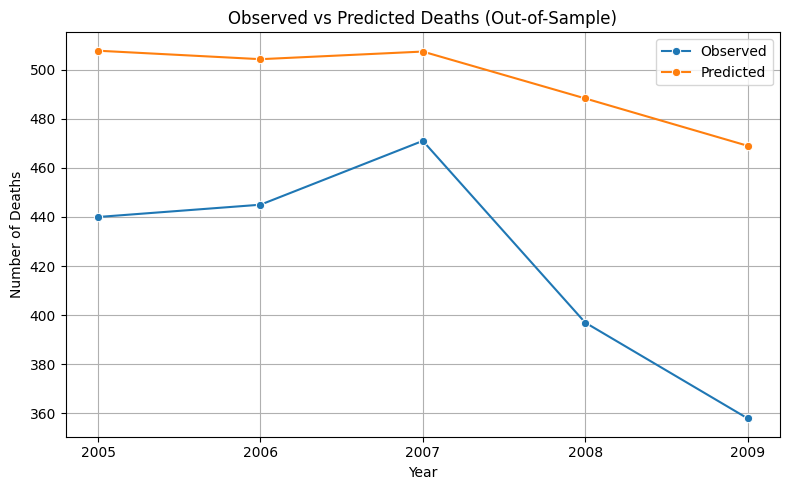

In [207]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=test, x="Year", y="Deaths", label="Observed", marker="o")
sns.lineplot(data=test, x="Year", y="Predicted_Deaths", label="Predicted", marker="o")
plt.title("Observed vs Predicted Deaths (Out-of-Sample)")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.legend()

# Show whole numbers on x-axis (years)
plt.xticks(ticks=test["Year"], labels=test["Year"].astype(int))

plt.tight_layout()
plt.show()

model overestimates deaths for all five held-out years (2005–2009)